# Summary

Following the discovery from price_to_fcf.ipynb, we continue to verify the chain of fear - oversell - mean reversion. And how to implement this strategy – NCAV, price to fcf, recent price crash, etc.

## Findings, intended or not

* All stocks, especially when tiny market cap stocks are included, as a whole usually outperform the S&P 500 index. Specifically, S&P 500 equal weight sometimes also outperform the S&P 500. The recent S&P 500 supremacy is not always there.

### Findings to be verified further
* Maybe it's not low price to FCF, but just low price. Because even when the FCF is negative, when the abs of the ratio is low (price is low relative to how bad the siutation, the expected return is also high. So the power is mean reversion rather than low valuation.
* Those uber cheap stocks actually outperform the market when the market doing well and lag when the market doing poorly. 
* Depending on just being uber cheap is not enough and the filter is too loose (too many will pass the filter). Therefore, strenghening the filte may result in further performance gain.

## WIP
[ x ] Build a grpah library to visualize the intuitive filters on top of being uber cheap (past price performance, low price to ncav, profit margin, etc.)


In [1]:
from research.interday_trading import InterdayTrading
from fmp_fetch import FMPOnline
from fmp_fetch.fmp_api import FMPAPI

api = FMPAPI()
fmp = FMPOnline()
t = InterdayTrading('2013-01-01', '2023-01-05')

In [2]:
spx_symbols = api.spx_constituents()

In [ ]:
from datetime import timedelta
from tqdm import tqdm

date_range = pd.date_range(start='2010-01-01', end='2019-01-01', freq=timedelta(days=365))
year_data = []
for date in tqdm(date_range):
    while not t._is_trading_day(pd.to_datetime(date).date()):
        date = (pd.to_datetime(date) + pd.DateOffset(days=1)).strftime('%Y-%m-%d')
    date = pd.to_datetime(date).strftime('%Y-%m-%d')
    current = t.build_features_for_date(pd.to_datetime(date).date(), use_return_after_days=365)
    current['spx_return'] = fmp.get_index_price('^GSPC', current['return_date'].iloc[0]) / fmp.get_index_price('^GSPC', date) - 1
    current['return'] = current['return_day_price'] / current['price'] - 1
    current['win_spx'] = current['return'] - current['spx_return']
    year_data.append(current)

data = pd.concat(year_data)

In [5]:
d = data
d.head()

symbol      price   num_shares    market_cap  free_cash_flow    min_fcf  \
0      A  20.050000  345000000.0  6.917250e+09        0.892556  -0.048433   
1   AACG   0.377390   22500000.0  8.491275e+06       -0.870437  -0.730437   
2    AAL   4.496876  106447500.0  4.786812e+08      -16.607191 -15.010705   
3   AAME   1.180000   22323000.0  2.634114e+07       -0.064488  -0.276495   
4   AAON   3.490000   58401000.0  2.038195e+08        0.464483  -0.013043   

   last_fcf  price_to_fcf  median_yoy   min_yoy  ...  return_day_price  \
0  0.031884     22.463571   -0.206822 -0.268006  ...         26.570000   
1 -0.730437     -0.433564   -0.013494 -0.202251  ...          0.300310   
2 -4.819277     -0.270779   -0.176066 -0.208772  ...         10.011914   
3  0.100076    -18.298048    0.001176 -0.011234  ...          1.860000   
4  0.121400      7.513725   -0.056939 -0.262201  ...          4.970000   

   return_num_shares  return_market_cap  return_date              sector  \
0        352000000.0       9.352640e+09   2011-01-04          Healthcare   
1         22200000.0       6.666882e+06   2011-01-04  Consumer Defensive   
2        145291500.0       1.454646e+09   2011-01-04         Industrials   
3         22312000.0       4.150032e+07   2011-01-04  Financial Services   
4         56184750.0       2.792382e+08   2011-01-04         Industrials   

                        industry        date  spx_return    return   win_spx  
0         Diagnostics & Research  2010-01-04    0.121104  0.325187  0.204083  
1  Education & Training Services  2010-01-04    0.121104 -0.204245 -0.325349  
2                       Airlines  2010-01-04    0.121104  1.226415  1.105311  
3                 Insurance—Life  2010-01-04    0.121104  0.576271  0.455167  
4  Building Products & Equipment  2010-01-04    0.121104  0.424069  0.302964  

[5 rows x 31 columns]

In [9]:
# Verify with the data from Yahoo finance

d[d.symbol == 'GME'][['date', 'return_date', 'price', 'return_day_price', 'return', 'spx_return', 'win_spx']]

date return_date     price  return_day_price    return  \
901   2010-01-04  2011-01-04  3.854643          3.787314 -0.017467   
932   2011-01-03  2012-01-03  3.856326          4.004453  0.038411   
966   2012-01-03  2013-01-02  4.004453          4.482403  0.119355   
1016  2012-12-31  2013-12-31  4.382833          8.871622  1.024175   
1104  2013-12-31  2014-12-31  8.871622          6.288959 -0.291115   
1170  2014-12-31  2015-12-31  6.288959          5.410106 -0.139745   
1223  2015-12-31  2016-12-30  5.410106          5.135571 -0.050745   
1295  2016-12-30  2018-01-02  5.135571          3.988464 -0.223365   
1375  2018-01-02  2019-01-02  3.988464          3.160276 -0.207646   
1476  2018-12-31  2019-12-31  3.051468          1.520000 -0.501879   

      spx_return   win_spx  
901     0.121104 -0.138571  
932     0.004081  0.034331  
966     0.145146 -0.025791  
1016    0.296012  0.728163  
1104    0.113906 -0.405021  
1170   -0.007266 -0.132479  
1223    0.095350 -0.146095  
1295    0.204116 -0.427481  
1375   -0.068914 -0.138731  
1476    0.288781 -0.790660

In [4]:
for c in d.columns:
    print(c)

symbol
price
num_shares
market_cap
free_cash_flow
min_fcf
last_fcf
price_to_fcf
median_yoy
min_yoy
last_yoy
m3
m6
m9
m12
opm_3m
opm_6m
opm_9m
opm_12m
ncav
price_to_ncav
return_day_price
return_num_shares
return_market_cap
return_date
sector
industry
date
spx_return
return
win_spx


# Price to FCF

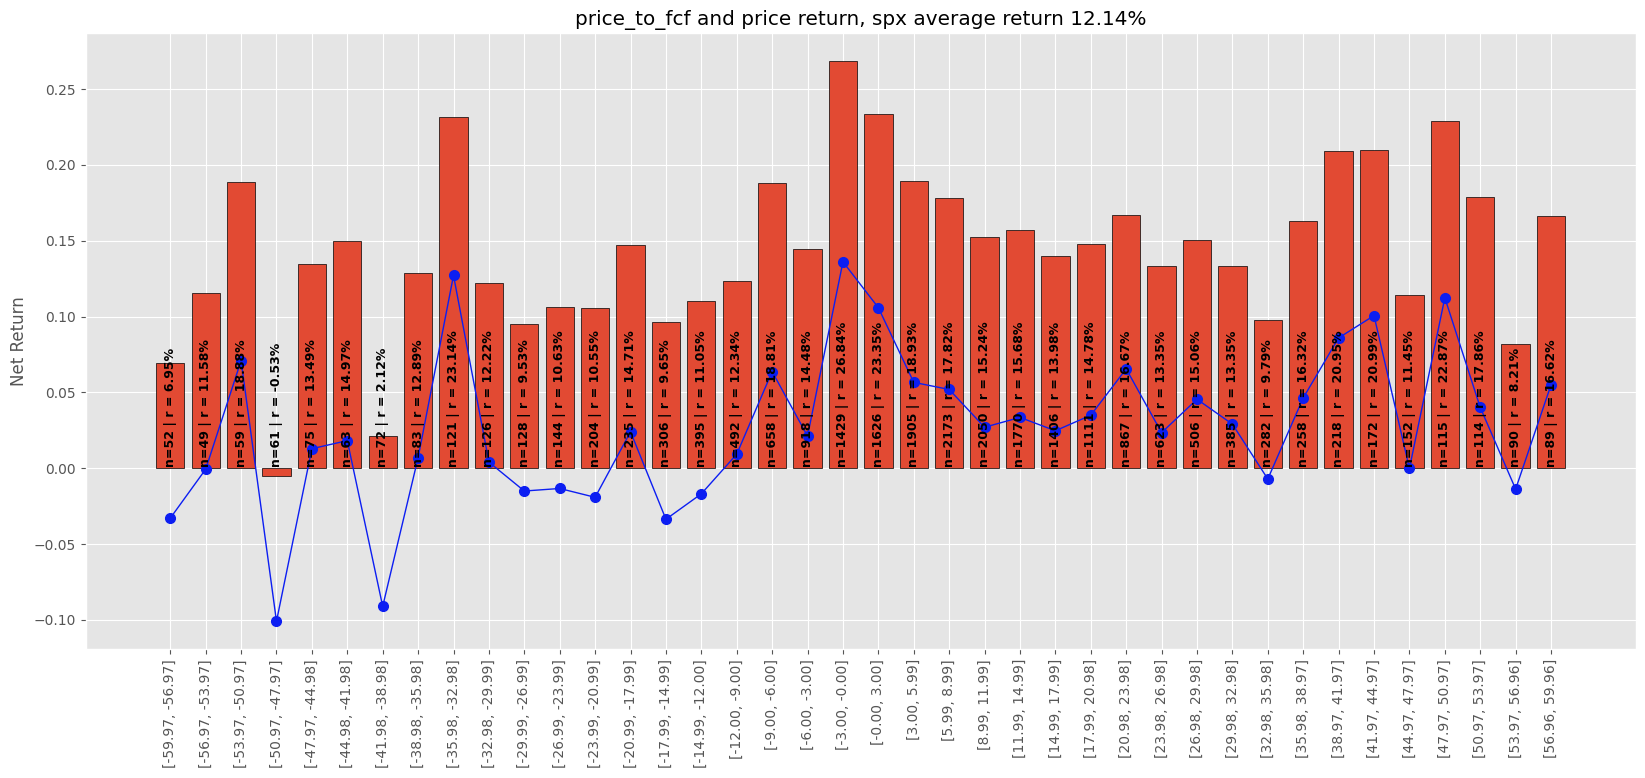

In [12]:
from utils.graph import per_group_return_graph

per_group_return_graph(d, 'price_to_fcf', -60, 60)


## Negative Price to FCF

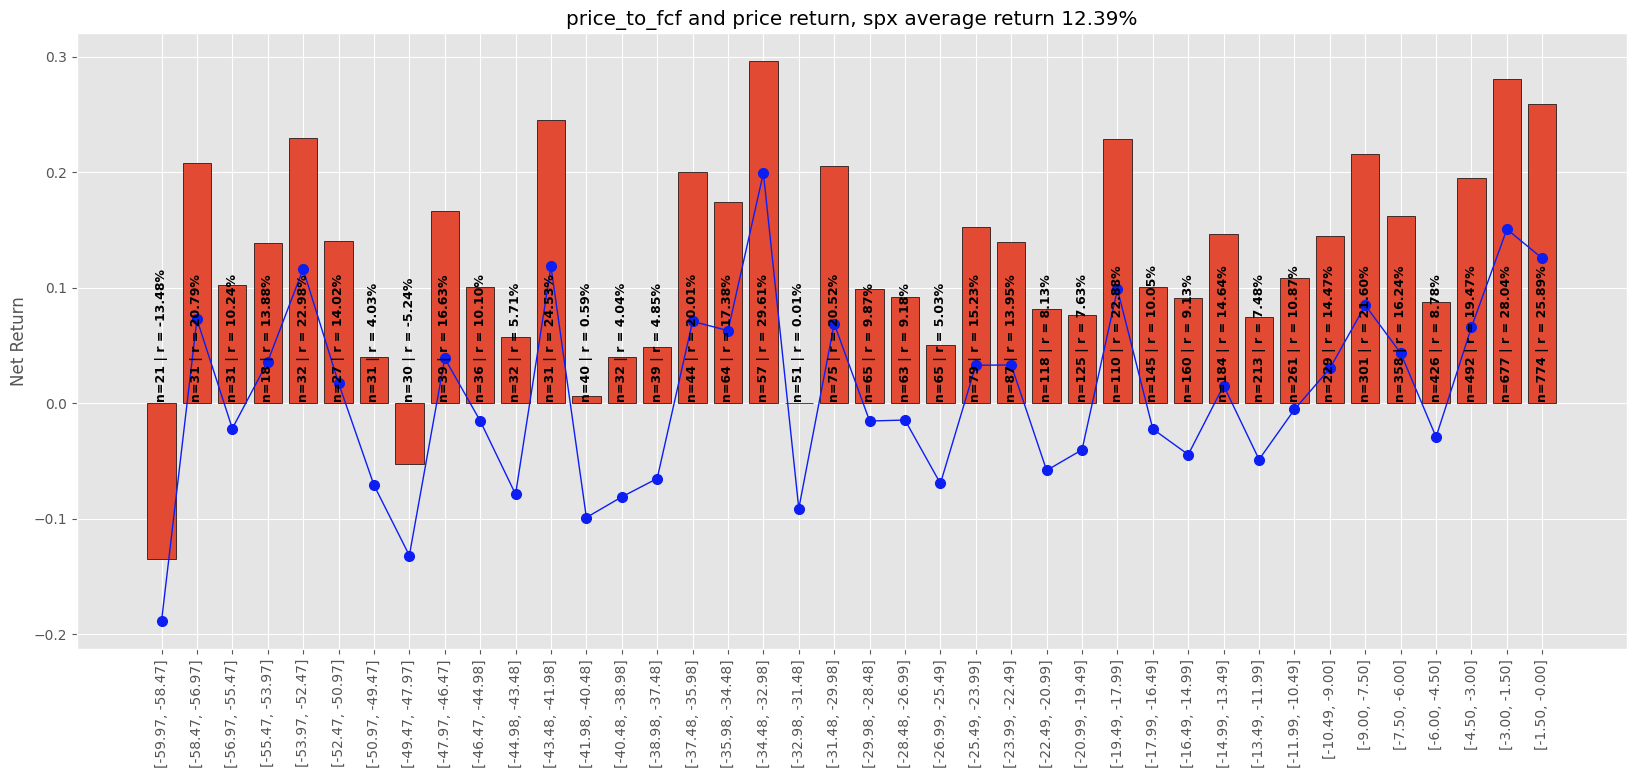

In [14]:
per_group_return_graph(d, 'price_to_fcf', -60, 0)

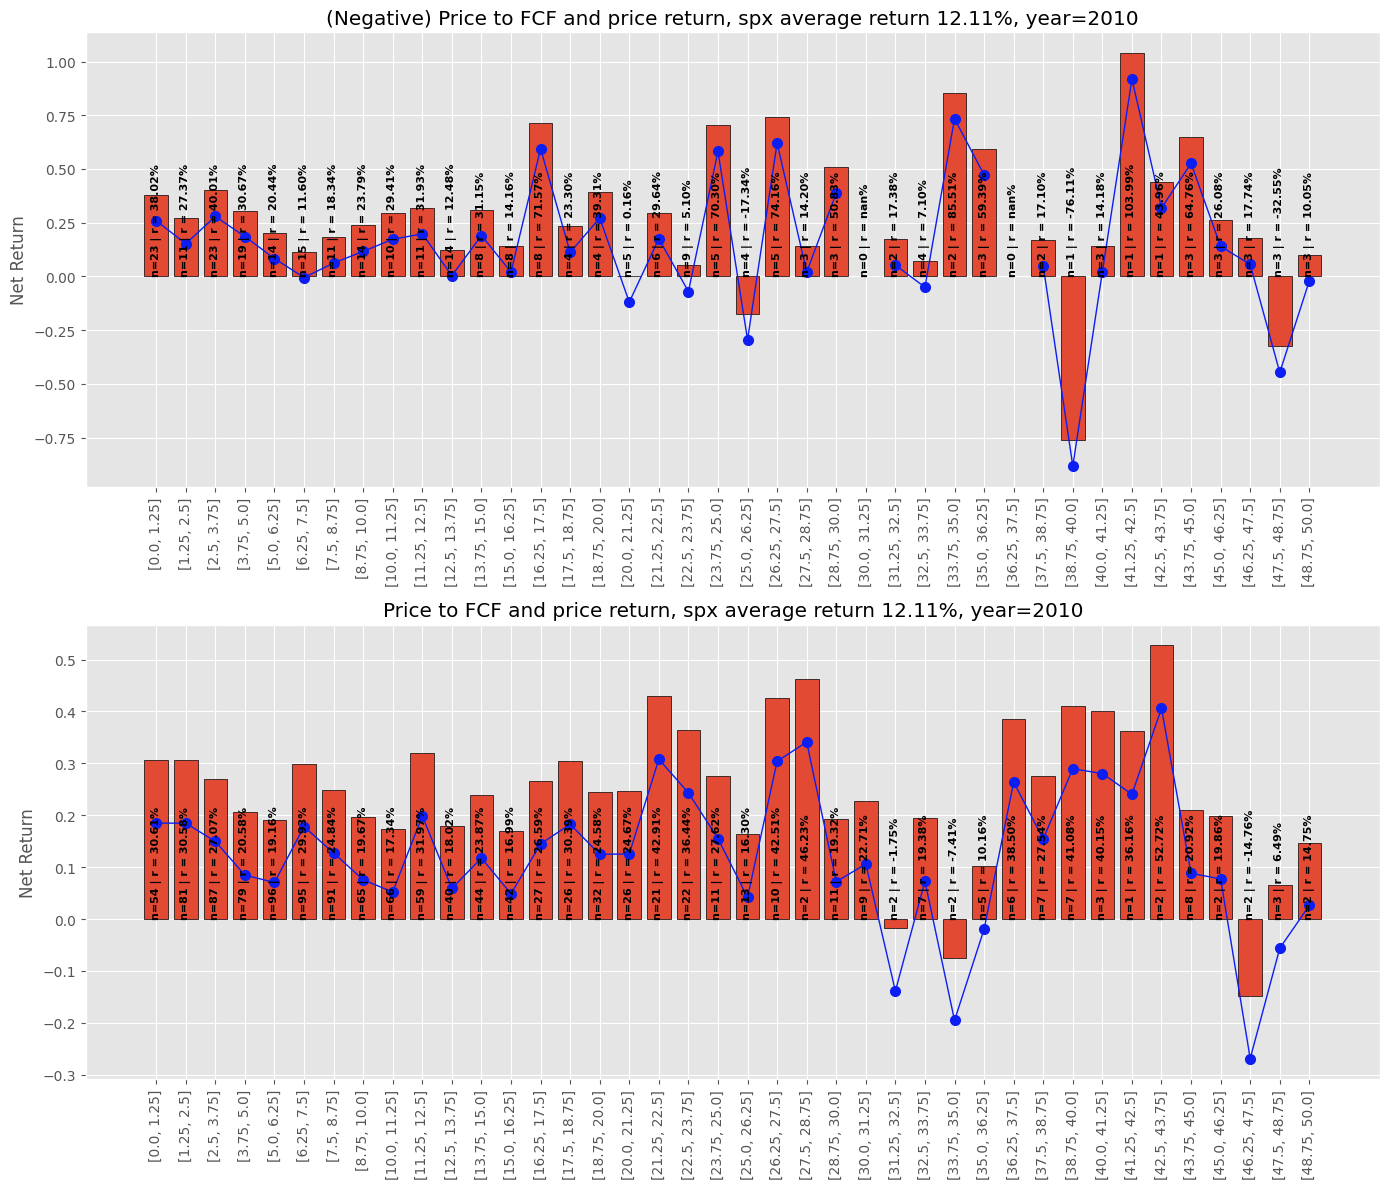

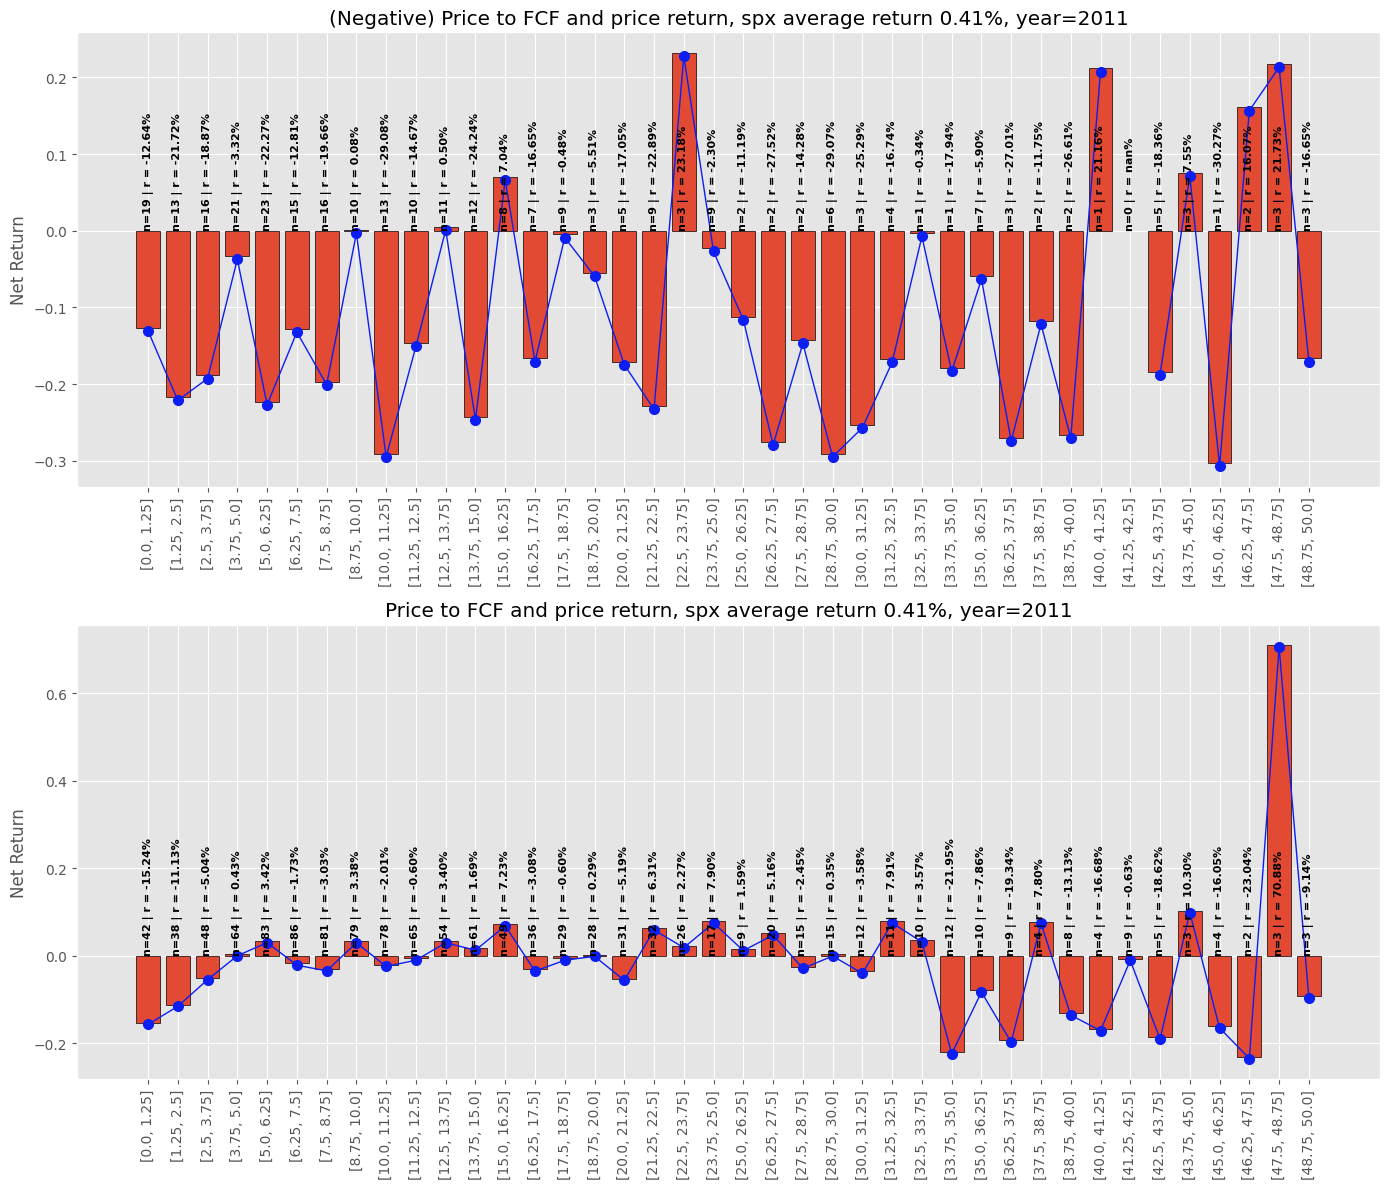

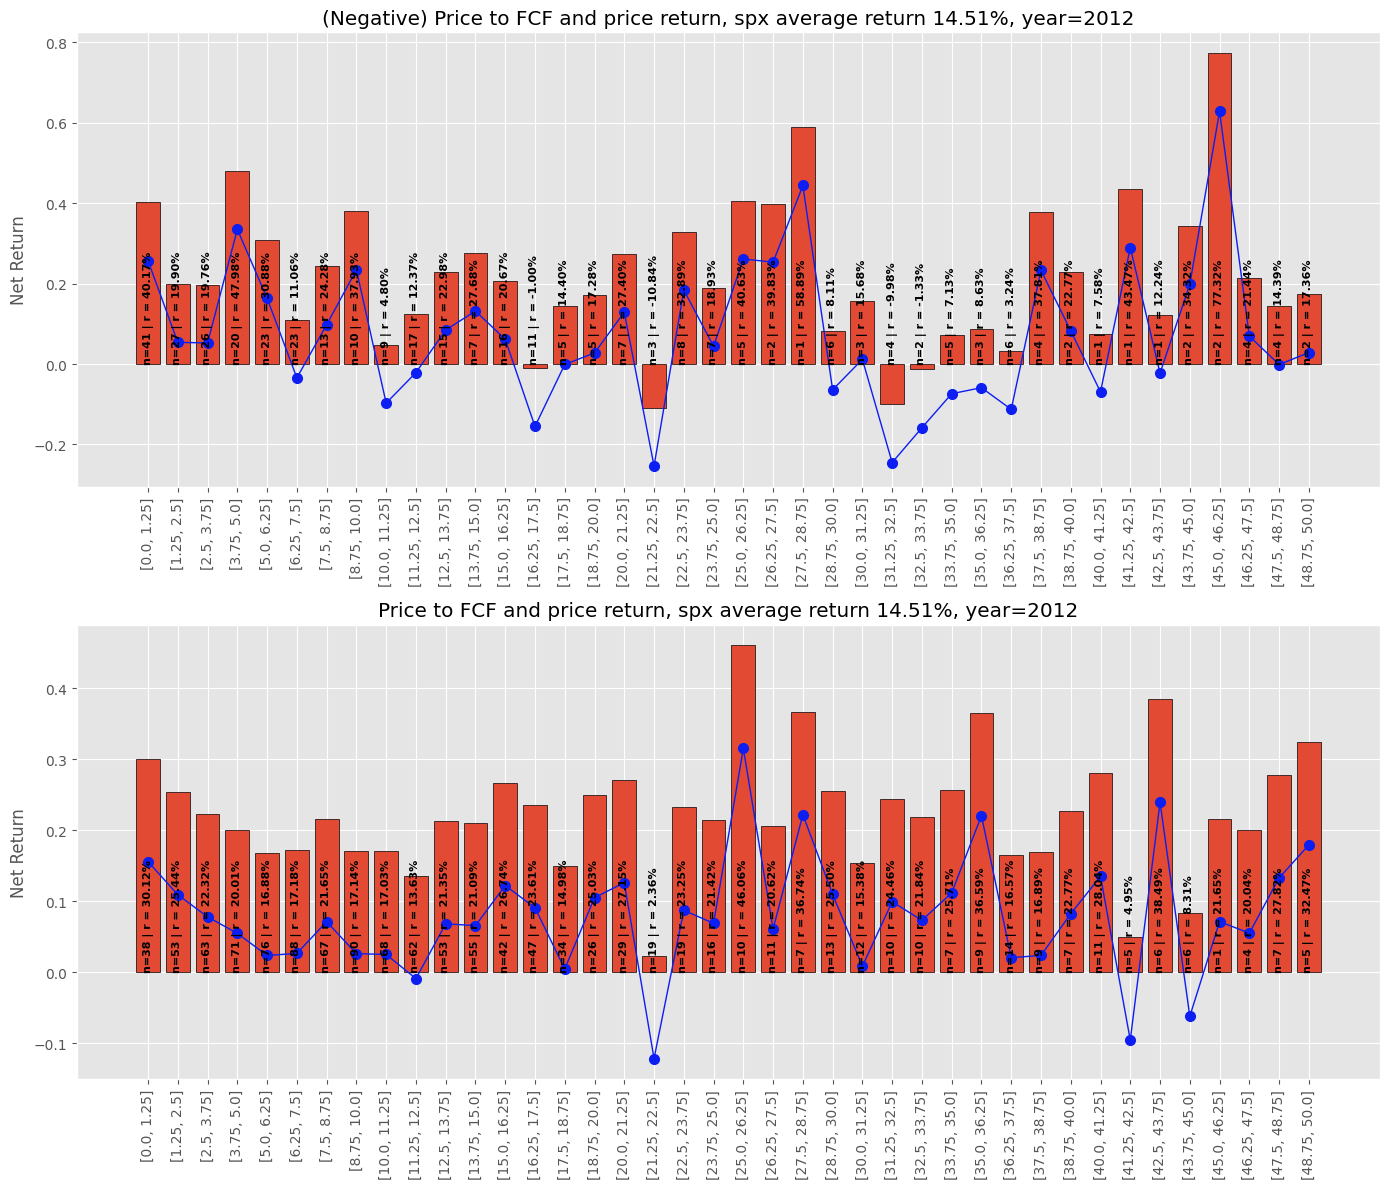

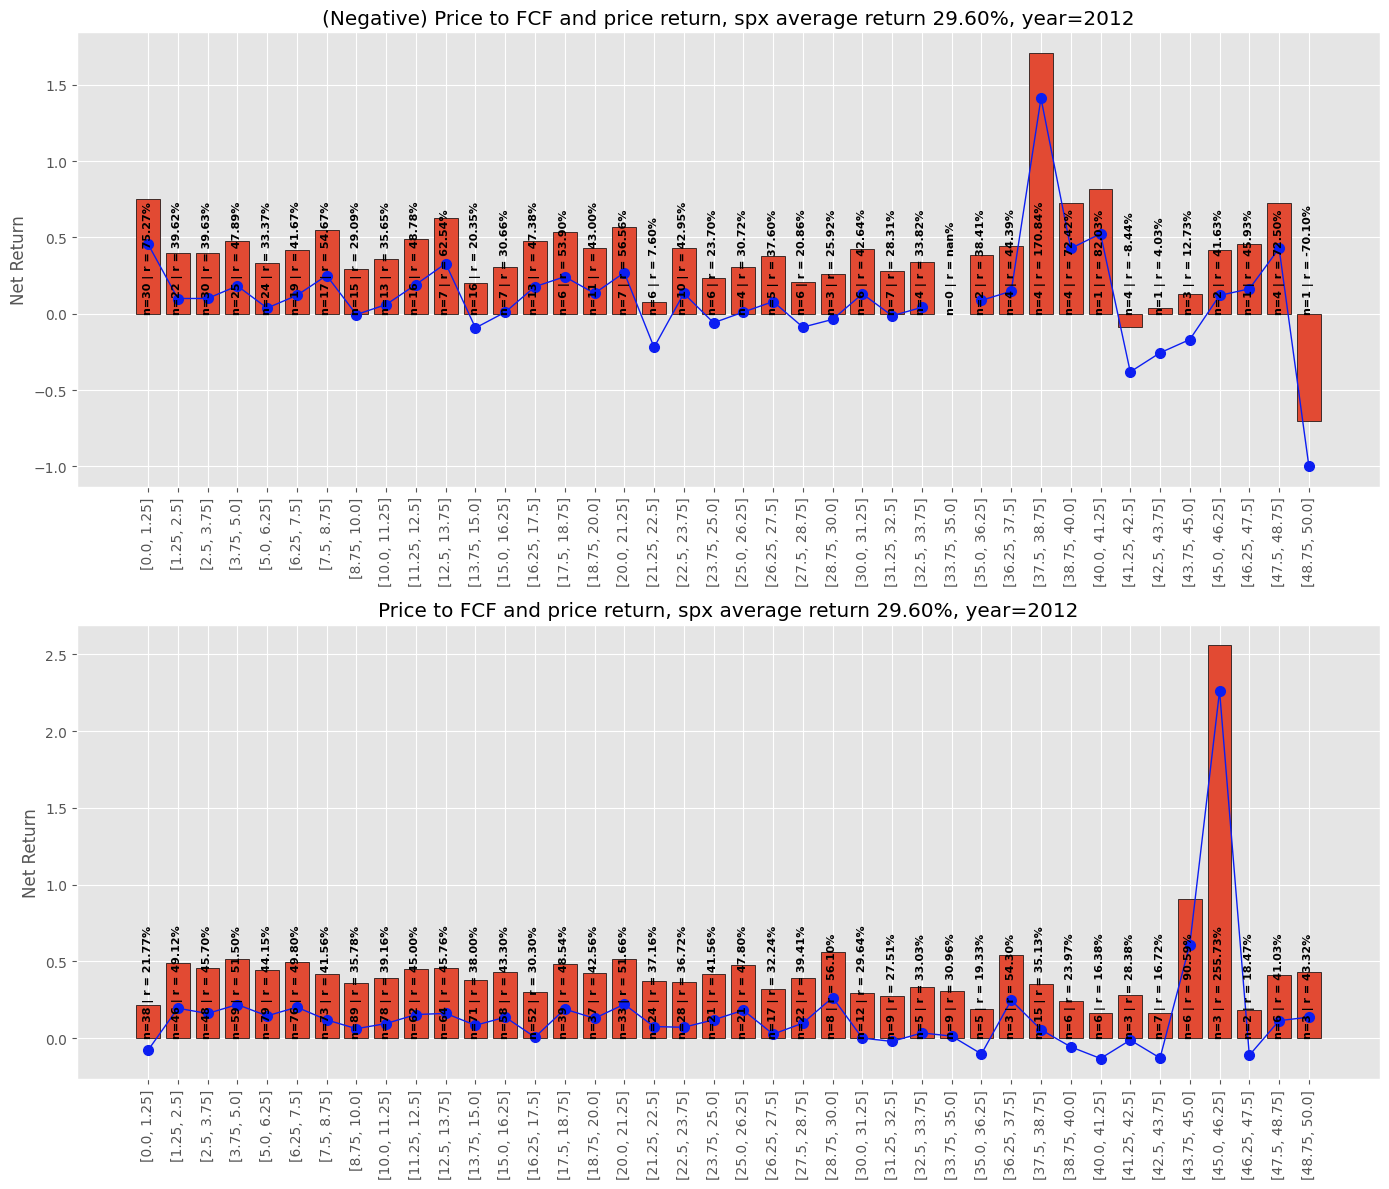

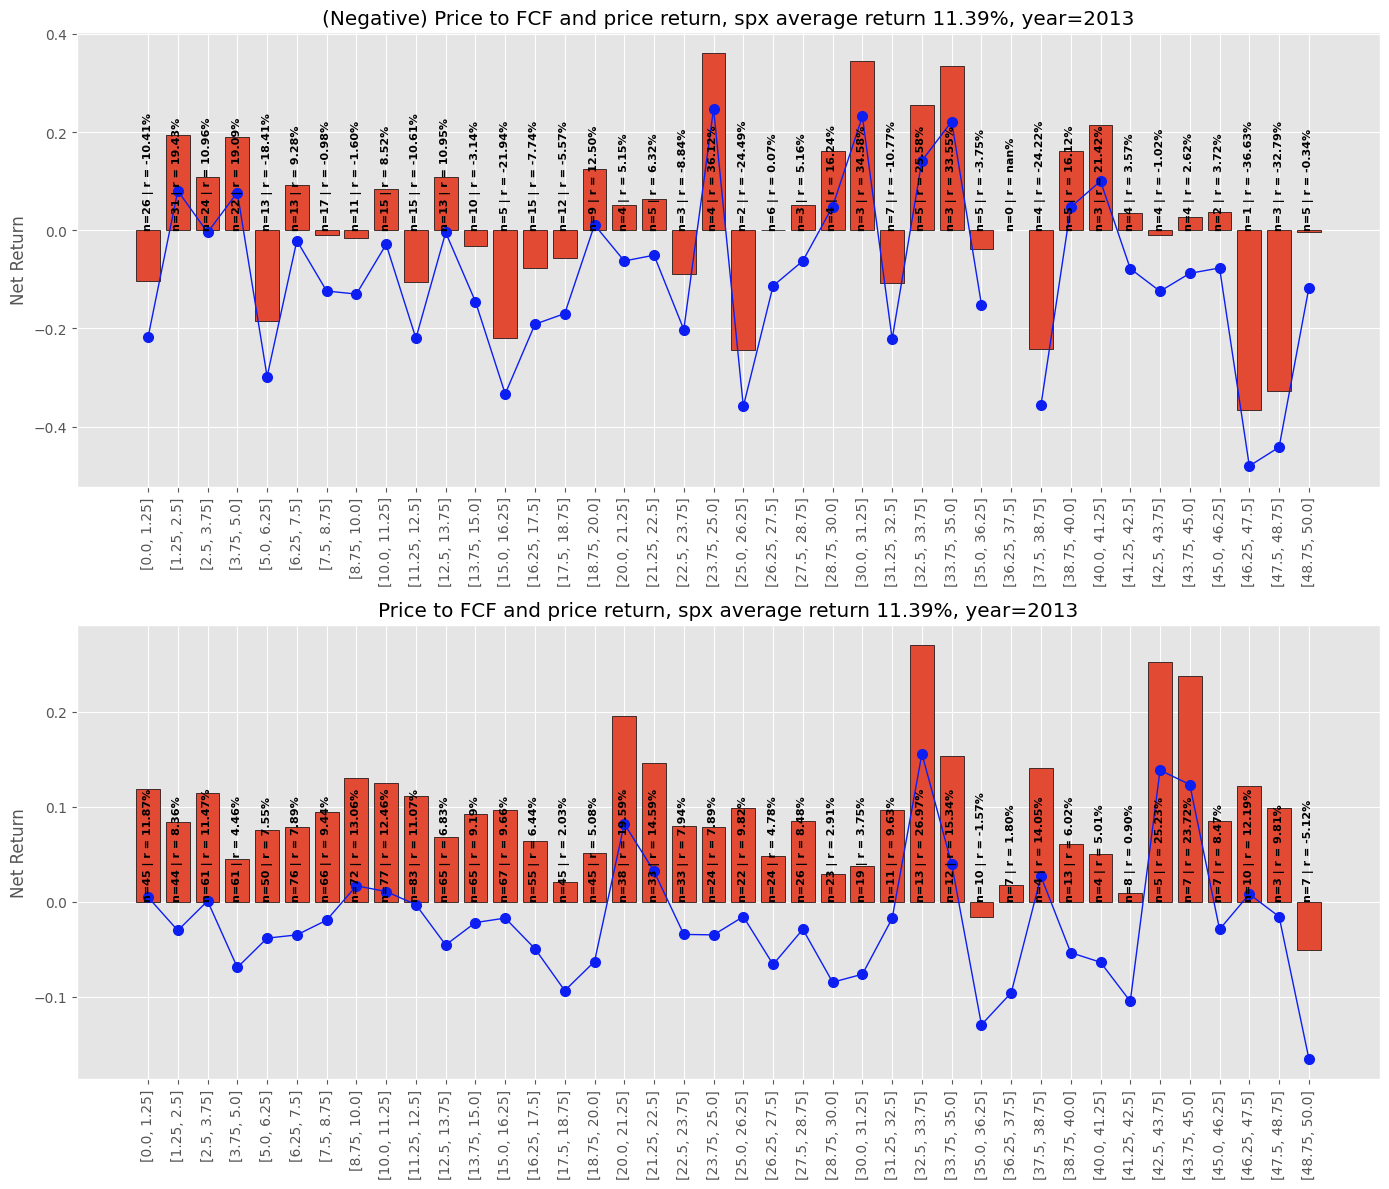

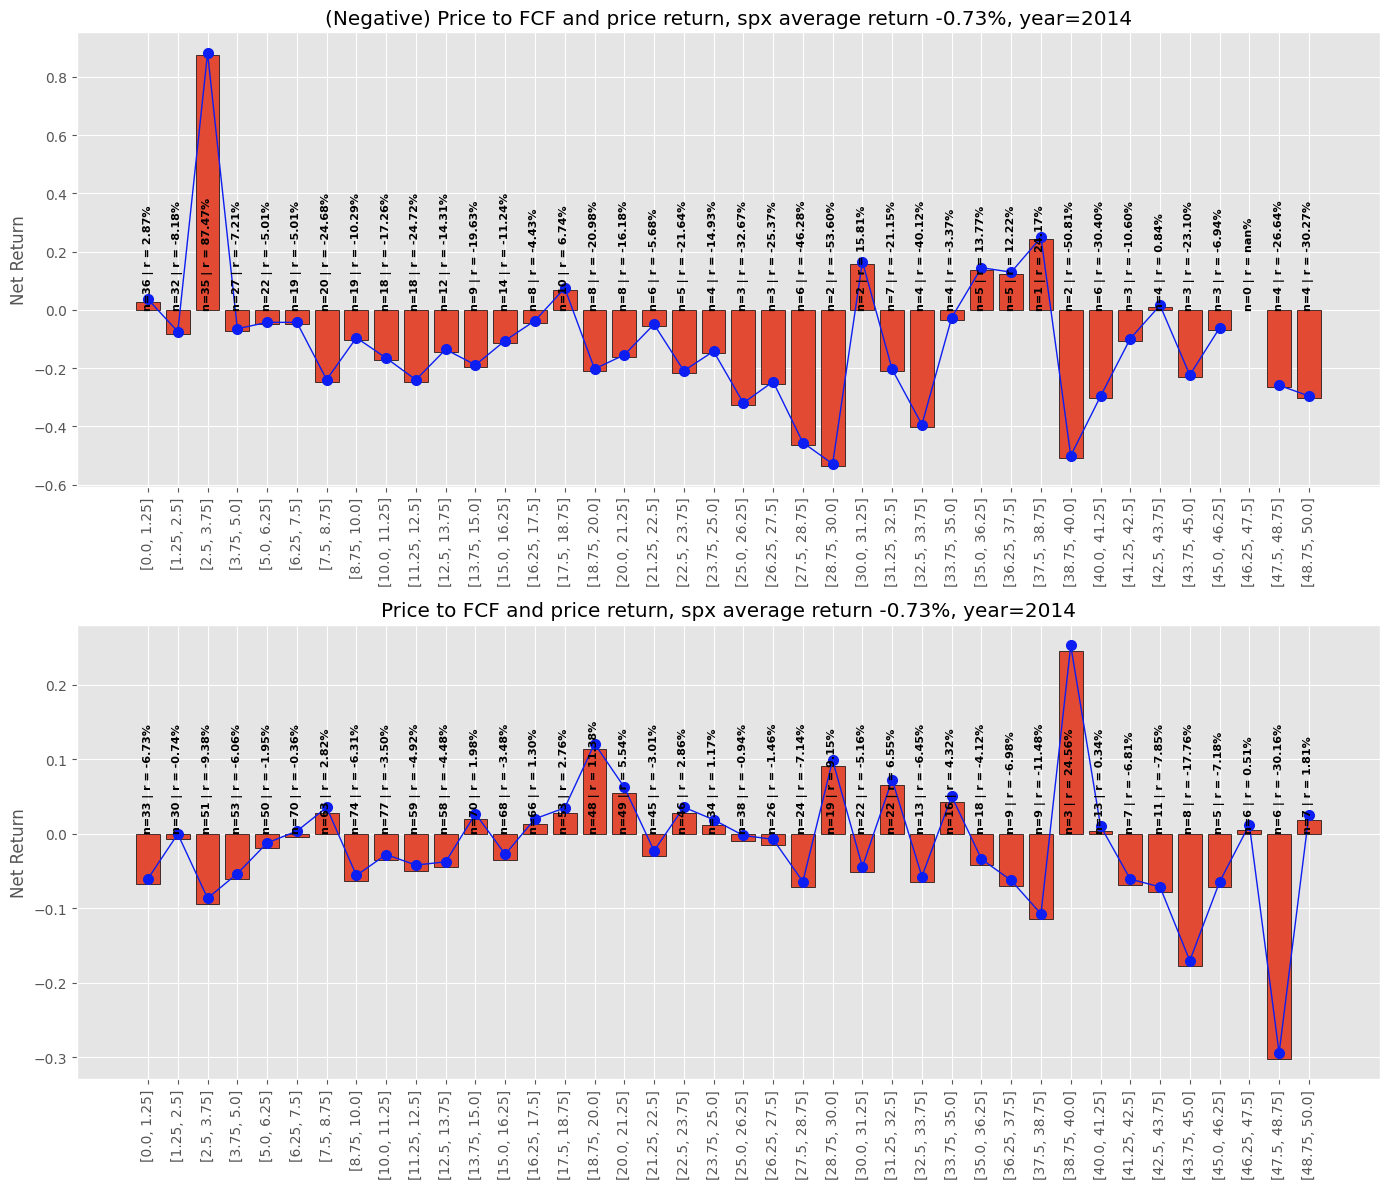

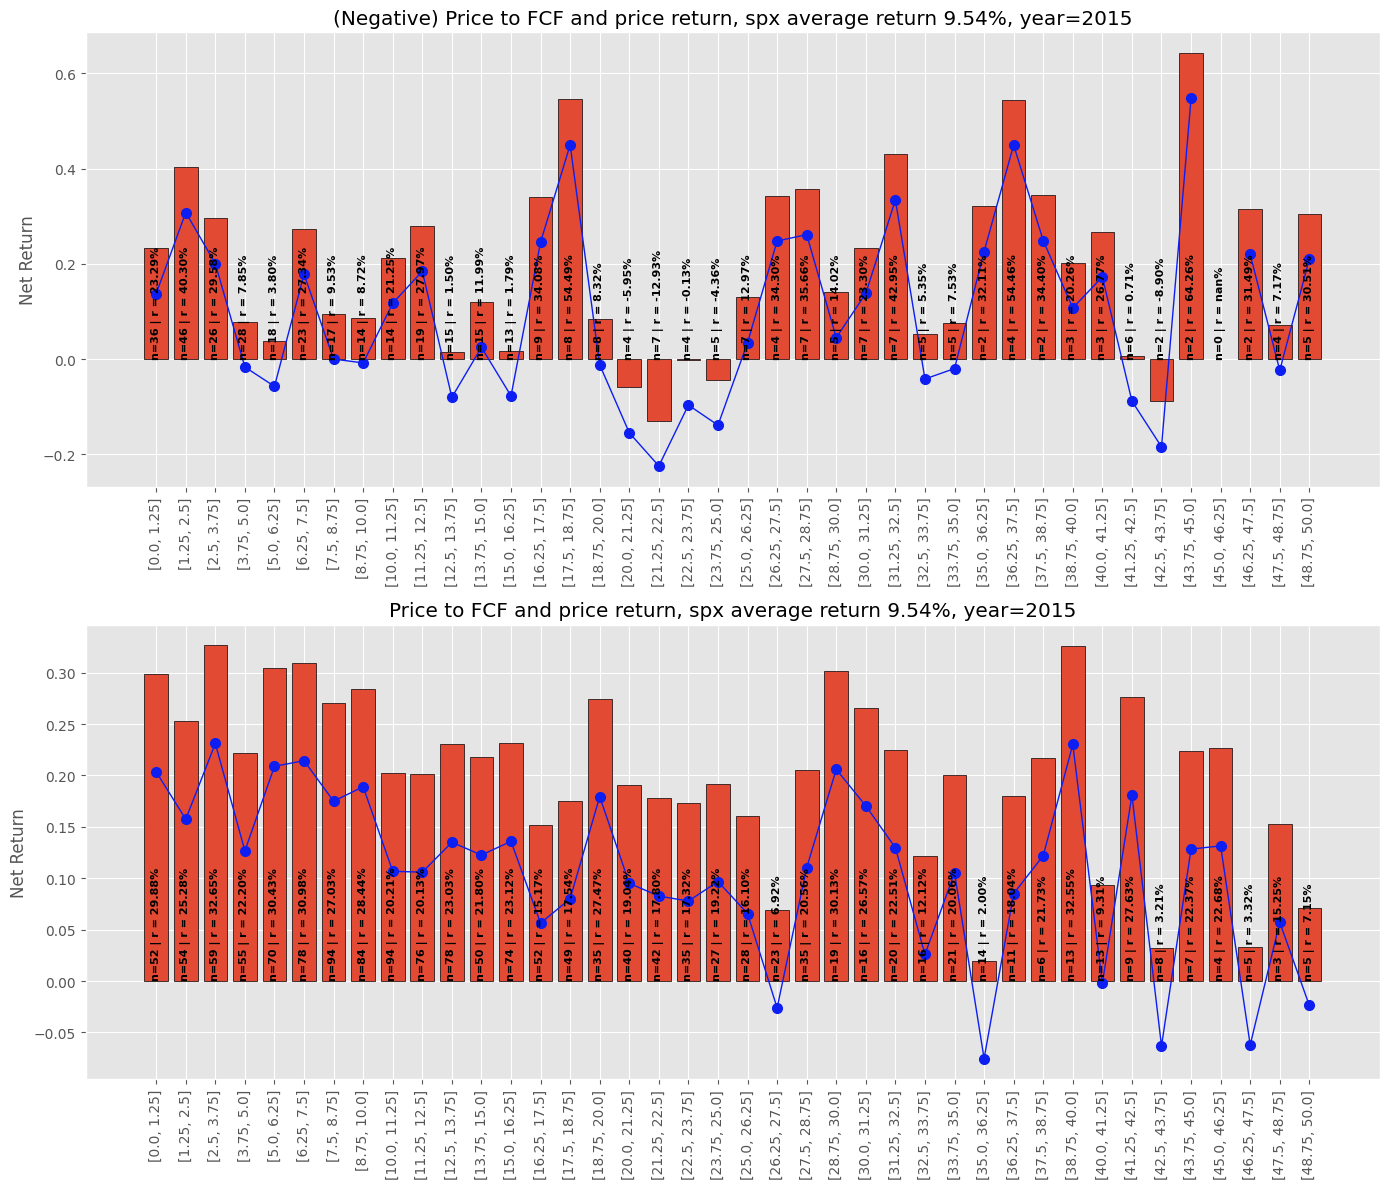

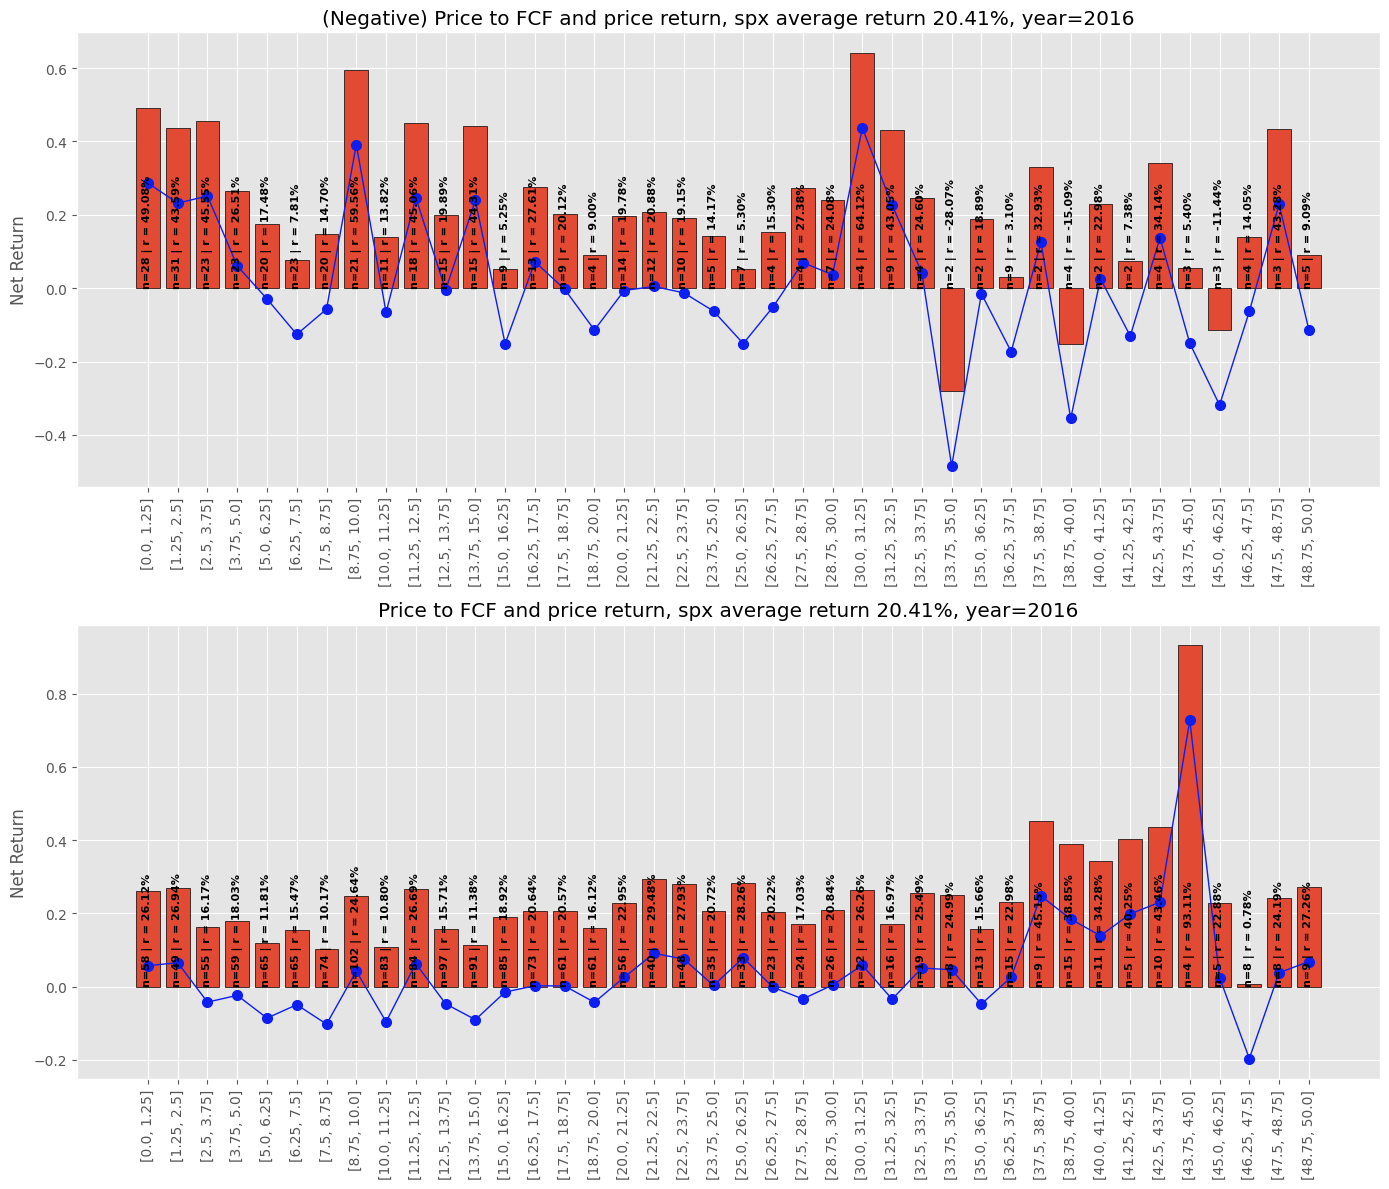

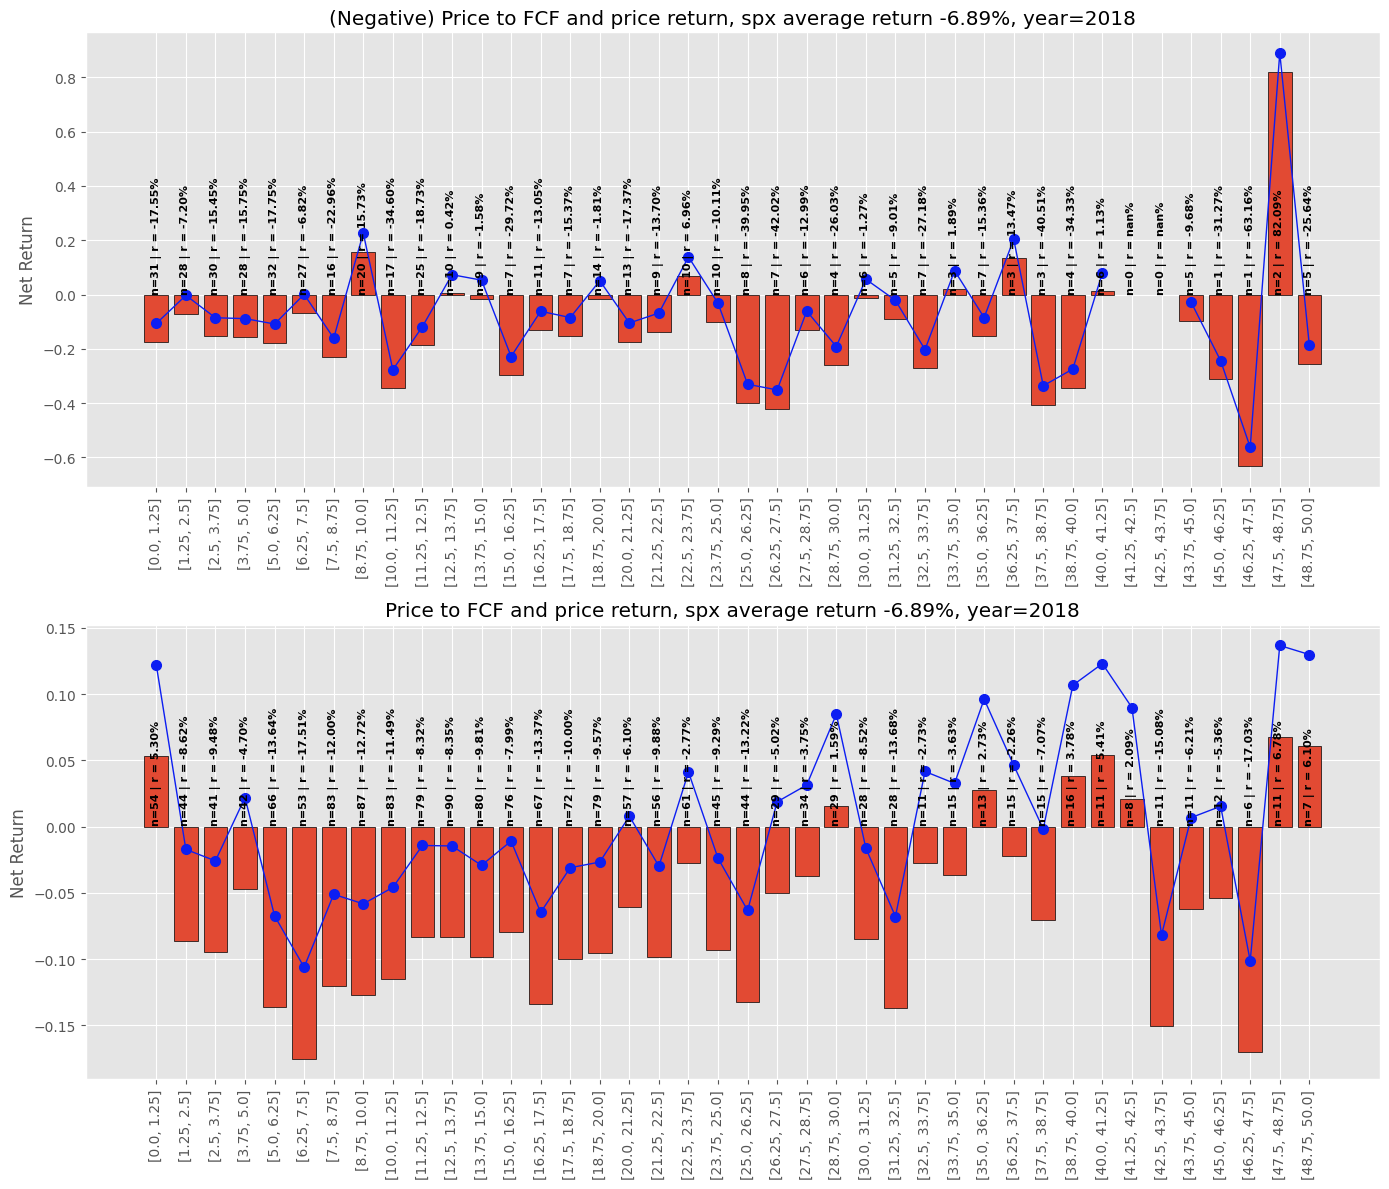

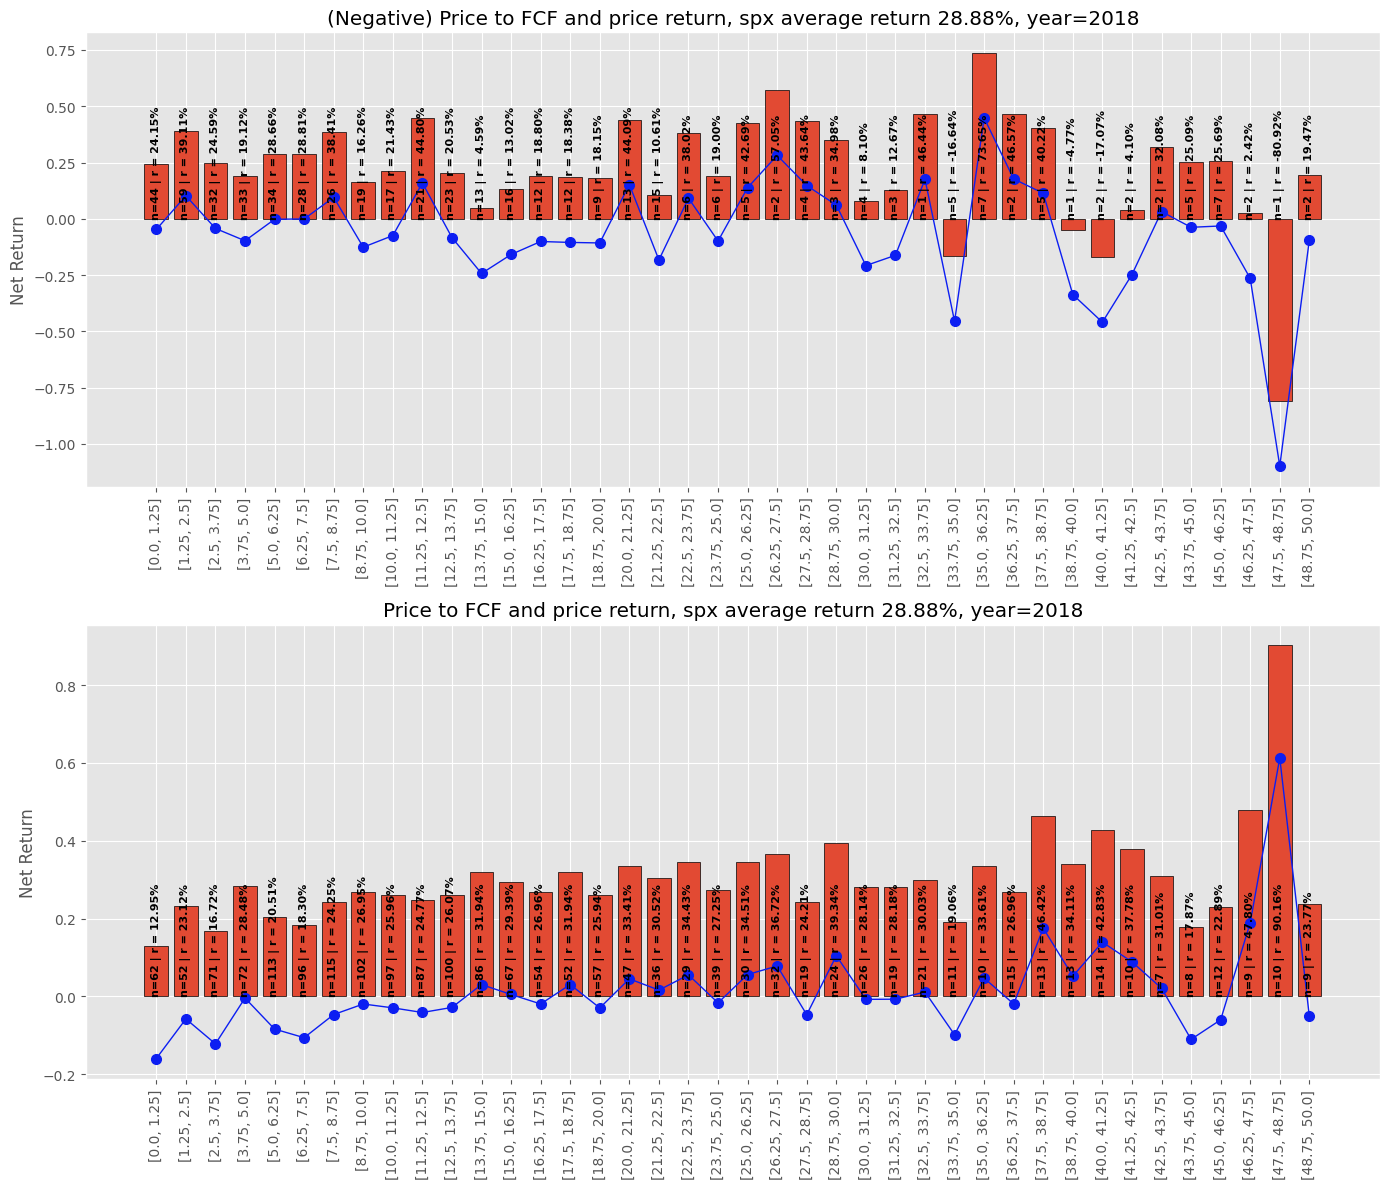

In [ ]:
def draw_price_to_pcf(yd):
    fig, axes = plt.subplots(2, 1, figsize=(14, 12))
    axes = axes.flatten()

    NUM_BINS = 40
    MAX_PRICE_TO_FCF = 100
    interval = MAX_PRICE_TO_FCF / NUM_BINS
    labels = [f'[{i * interval}, {(i+1)*interval}]' for i in range(NUM_BINS)]
    fcf = yd[(yd['price_to_fcf'] < 0) & (yd.price_to_fcf > -MAX_PRICE_TO_FCF)]
    fcf = fcf.replace([np.inf, -np.inf], np.nan)
    fcf = fcf.dropna()
    fcf = fcf[fcf.market_cap > 100e6]
    fcf['neg_price_to_fcf'] = -fcf['price_to_fcf']
    x = pd.cut(fcf['neg_price_to_fcf'], bins=NUM_BINS, labels=labels).rename('neg_price_to_fcf_bin')
    y = fcf.groupby(x, observed=False).agg({"spx_return": "mean", "return": "mean", "symbol": "count", "win_spx": "mean"}).reset_index()
    bars = axes[0].bar(y['neg_price_to_fcf_bin'], y['return'], edgecolor='black')
    axes[0].plot(y['neg_price_to_fcf_bin'], y['win_spx'], '-o', color='#0c1ef2', linewidth=1, markersize=7, zorder=3)
    for i, bar in enumerate(bars):
        axes[0].text(bar.get_x() + bar.get_width()/2, 
                0.001, 
                f'n={y["symbol"].iloc[i]} | r = {y["return"].iloc[i] * 100:.2f}%', 
                ha='center', 
                va='bottom', 
                rotation=90, 
                fontsize=8,
                fontweight='bold')
    axes[0].set_xticks(ticks=y['neg_price_to_fcf_bin'], labels=y['neg_price_to_fcf_bin'], rotation=90)
    axes[0].set_ylabel("Net Return")
    axes[0].set_title(f"(Negative) Price to FCF and price return, spx average return {yd['spx_return'].mean() * 100:.2f}%, year={yd.date.iloc[0].year}")

    NUM_BINS = 40
    MAX_PRICE_TO_FCF = 100
    interval = MAX_PRICE_TO_FCF / NUM_BINS
    labels = [f'[{i * interval}, {(i+1)*interval}]' for i in range(NUM_BINS)]
    fcf = yd[(yd['price_to_fcf'] > 0) & (yd.price_to_fcf < MAX_PRICE_TO_FCF)]
    fcf = fcf.replace([np.inf, -np.inf], np.nan)
    fcf = fcf.dropna()
    fcf = fcf[fcf.market_cap > 100e6]

    x = pd.cut(fcf['price_to_fcf'], bins=NUM_BINS, labels=labels).rename('price_to_fcf_bin')
    y = fcf.groupby(x, observed=False).agg({"spx_return": "mean", "return": "mean", "symbol": "count", "win_spx": "mean"}).reset_index()

    bars = axes[1].bar(y['price_to_fcf_bin'], y['return'], edgecolor='black')
    axes[1].plot(y['price_to_fcf_bin'], y['win_spx'], '-o', color='#0c1ef2', linewidth=1, markersize=7, zorder=3)

    for i, bar in enumerate(bars):
        axes[1].text(bar.get_x() + bar.get_width()/2, 
            0.001, 
            f'n={y["symbol"].iloc[i]} | r = {y["return"].iloc[i] * 100:.2f}%', 
            ha='center', 
            va='bottom', 
            rotation=90, 
            fontsize=8,
            fontweight='bold')
    axes[1].set_xticks(ticks=y['price_to_fcf_bin'], labels=y['price_to_fcf_bin'], rotation=90)
    axes[1].set_ylabel("Net Return")
    axes[1].set_title(f"Price to FCF and price return, spx average return {yd['spx_return'].mean() * 100:.2f}%, year={yd.date.iloc[0].year}")    
    fig.tight_layout()
    
    

for yd in year_data:
    draw_price_to_pcf(yd)

# Price to net current asset value (net-net stocks)

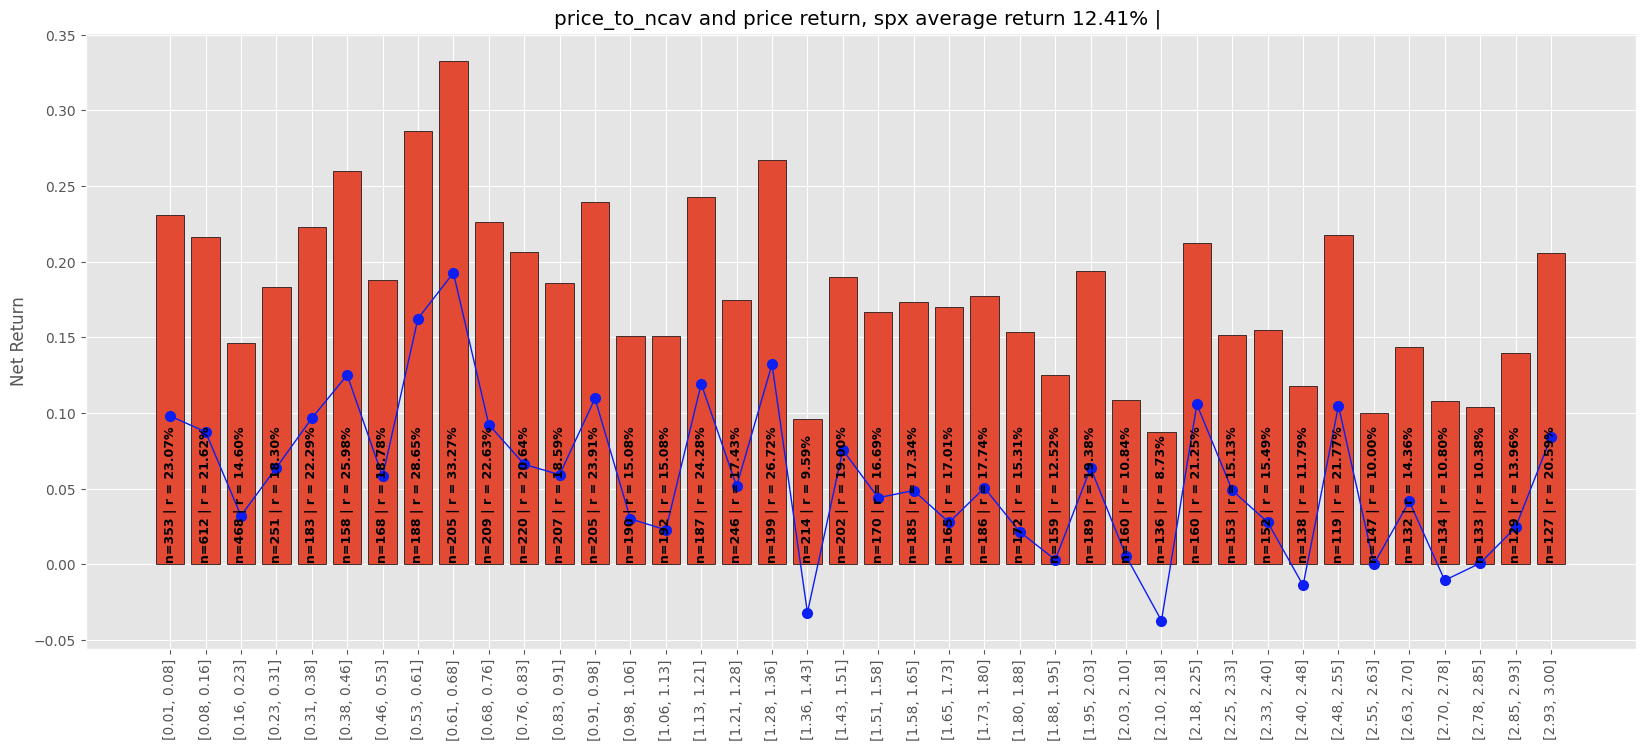

In [19]:

per_group_return_graph(d, 'price_to_ncav', 0.01, 3)

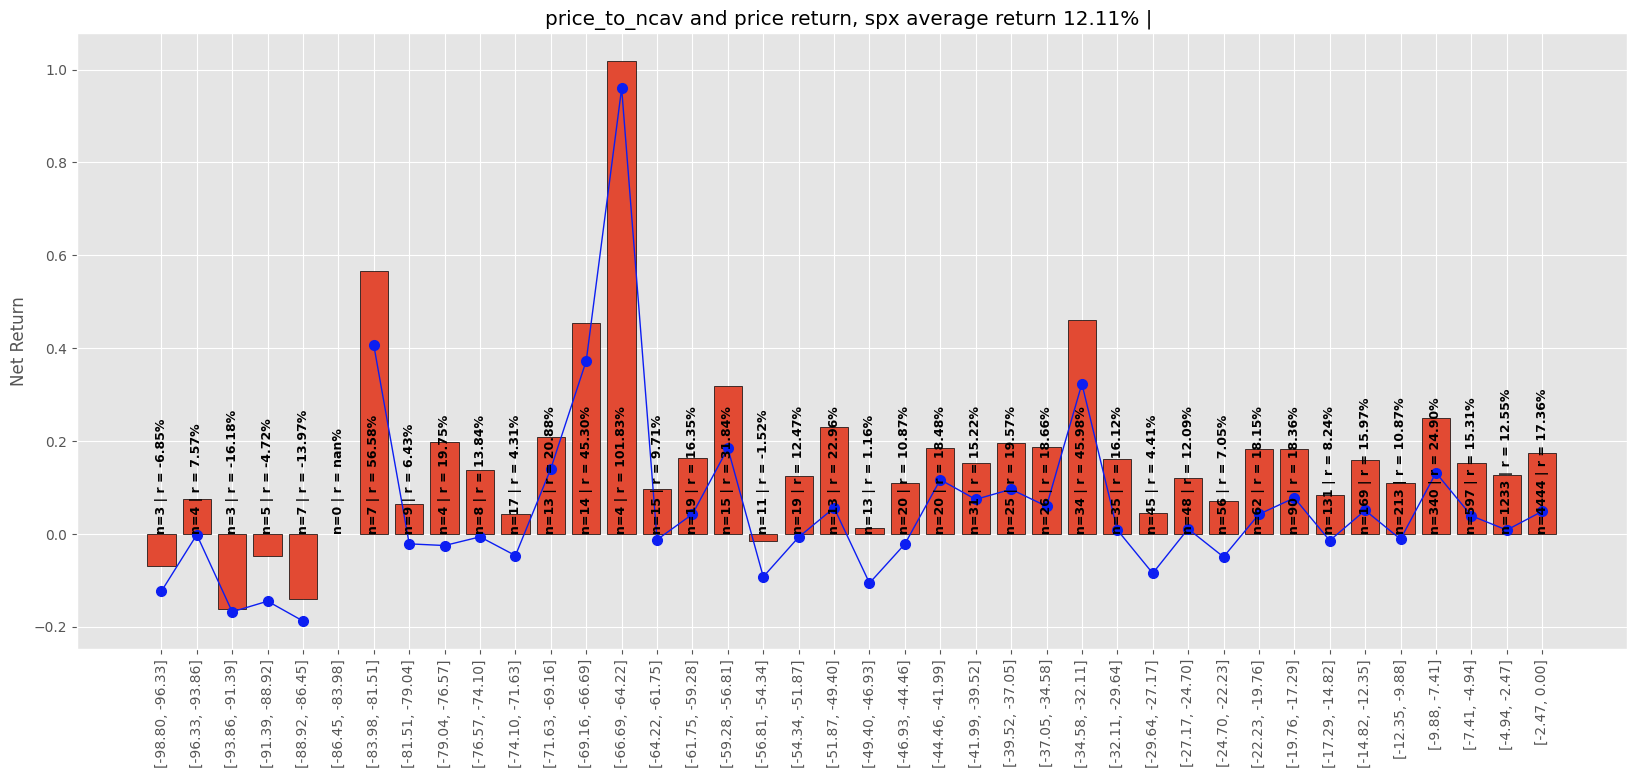

In [20]:
per_group_return_graph(d, 'price_to_ncav', -100, 0)

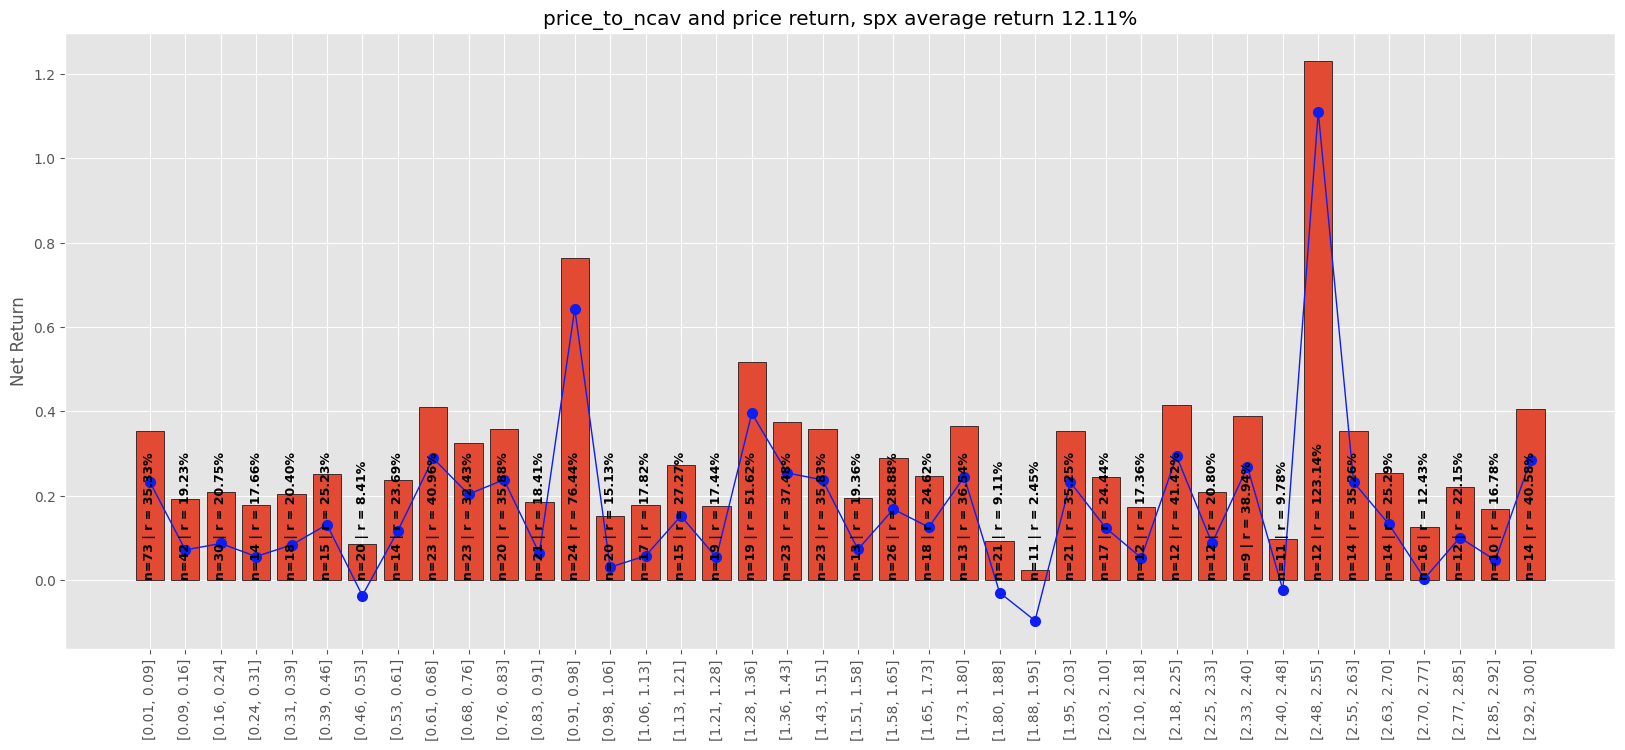

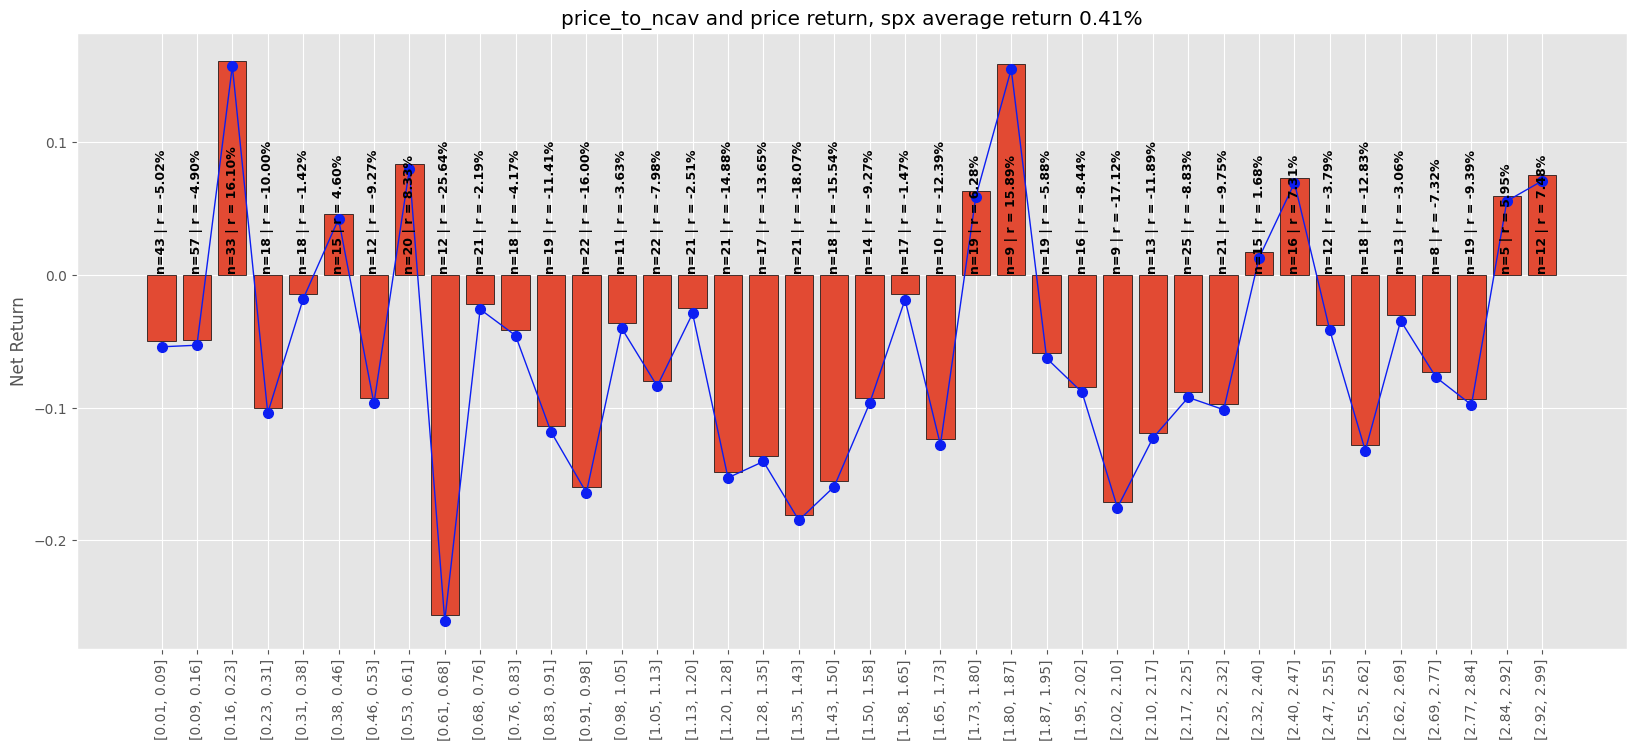

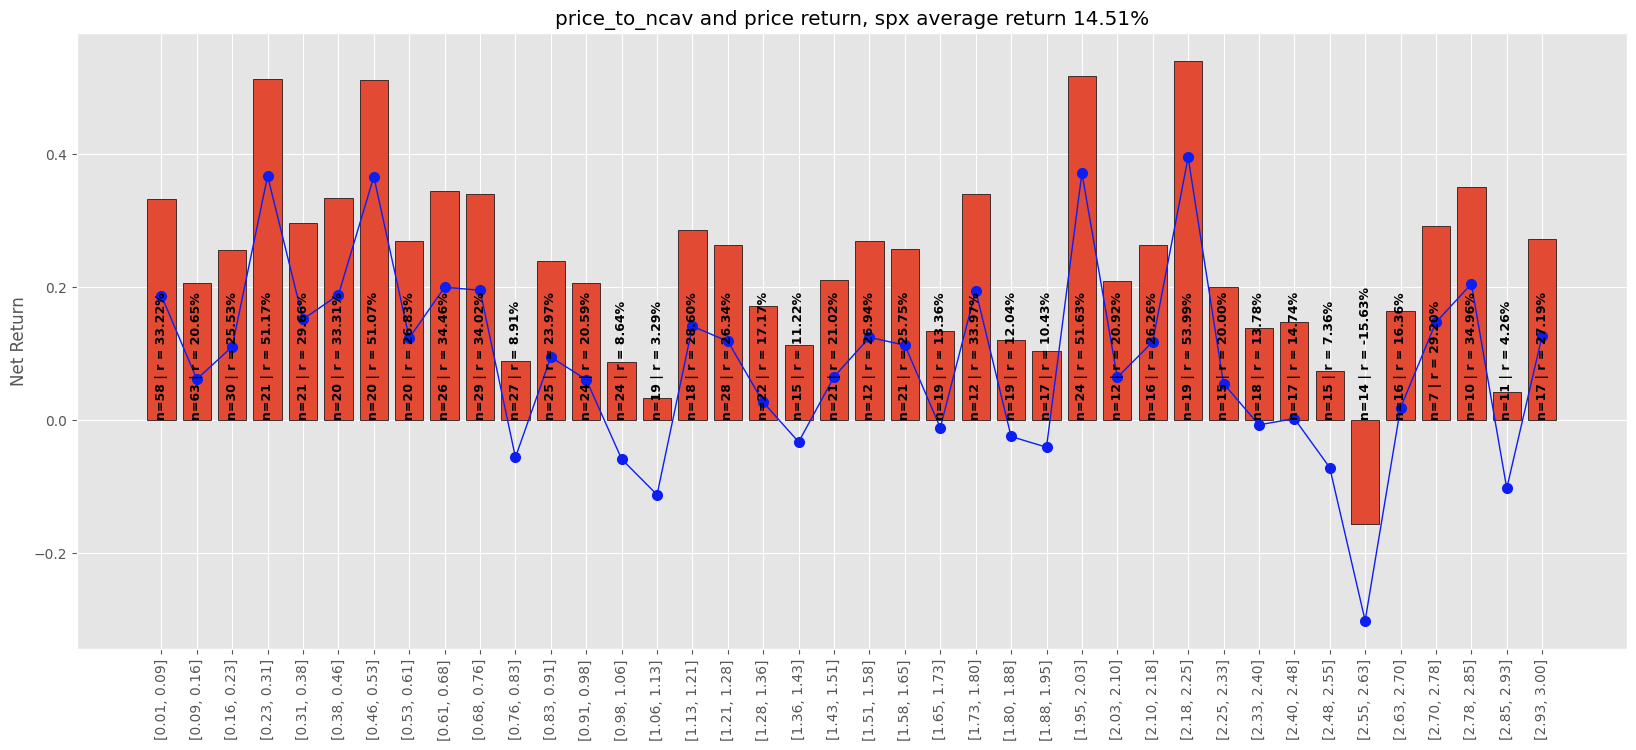

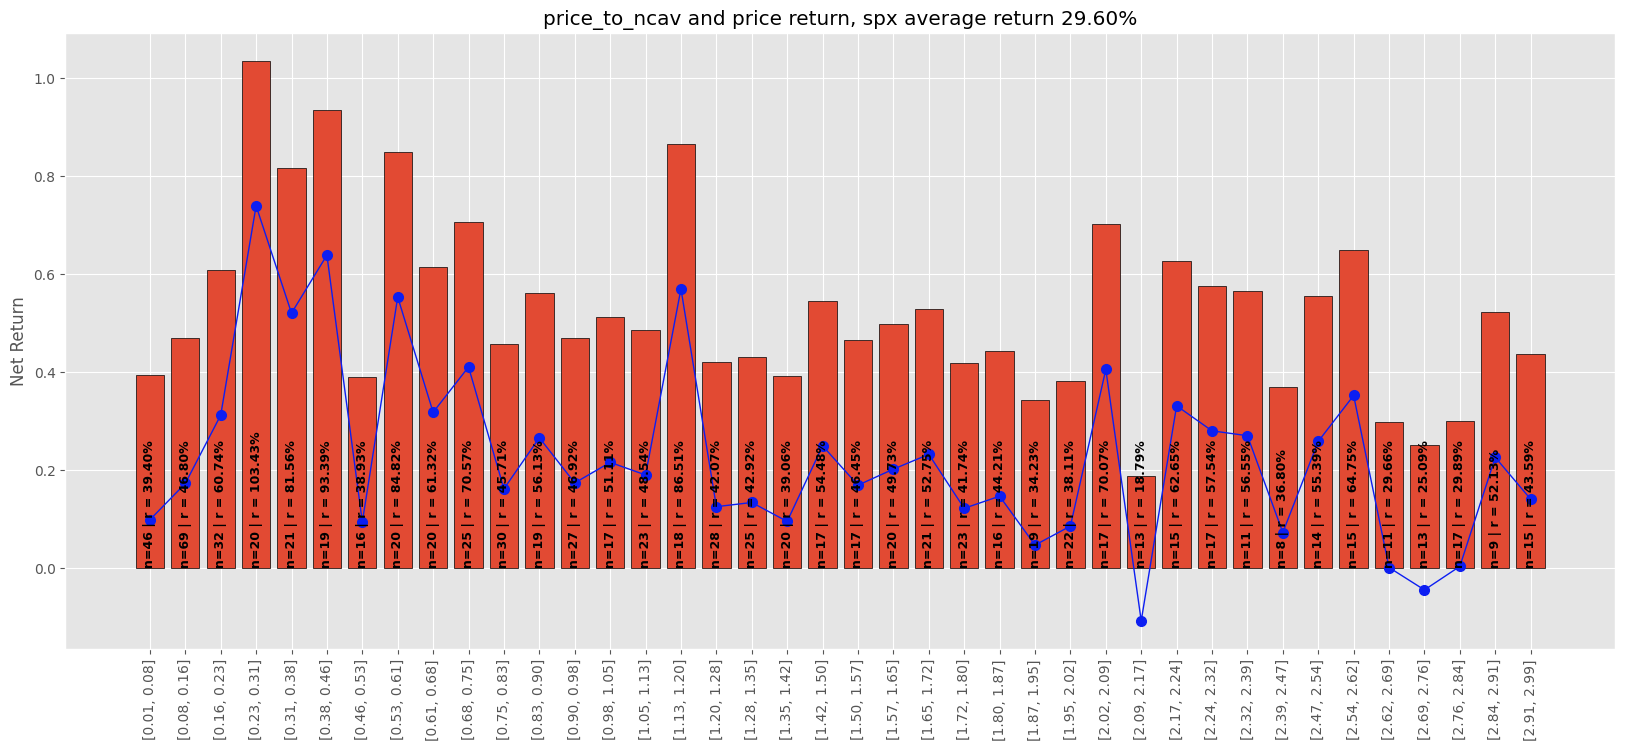

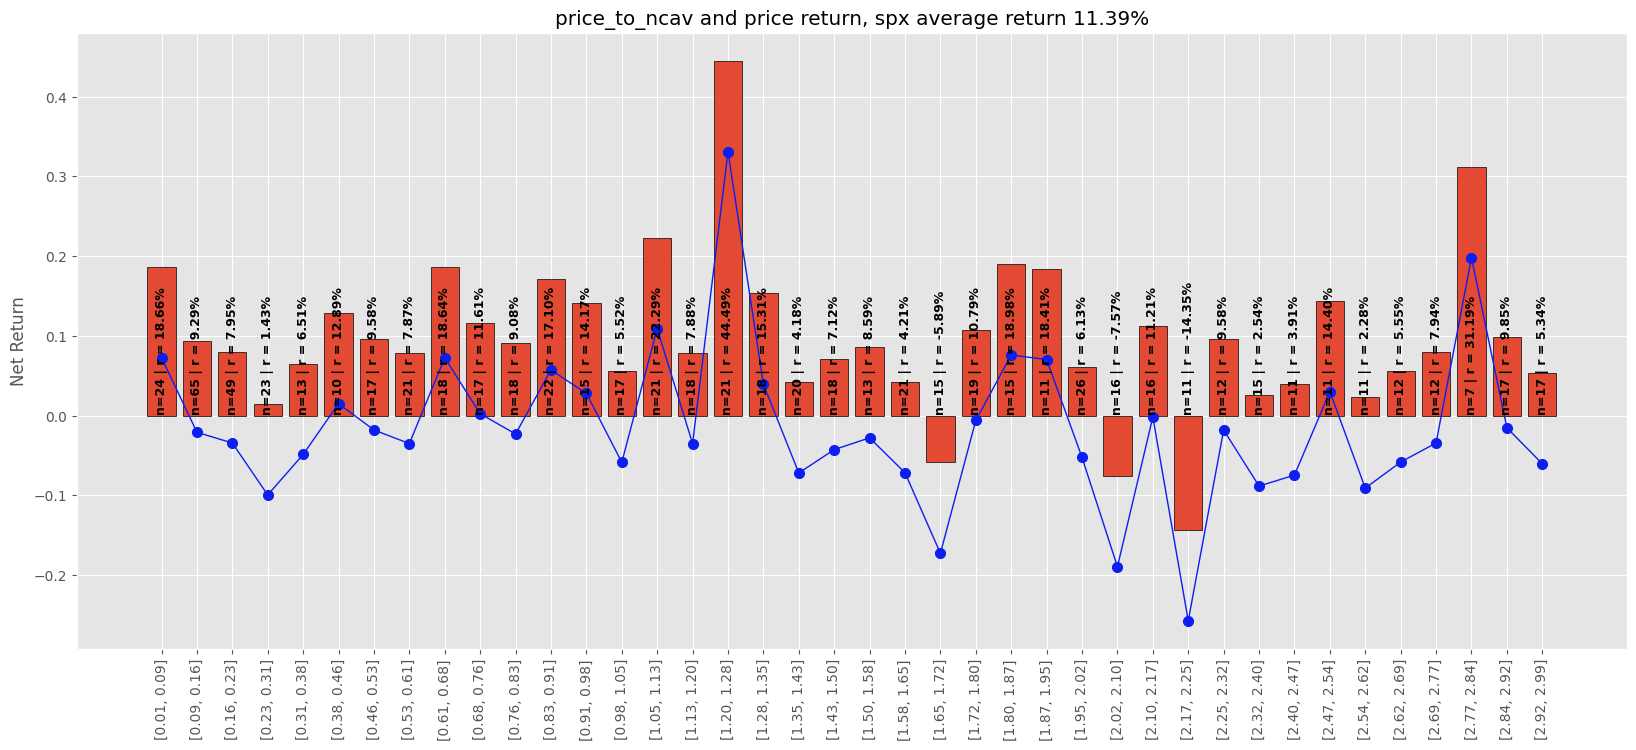

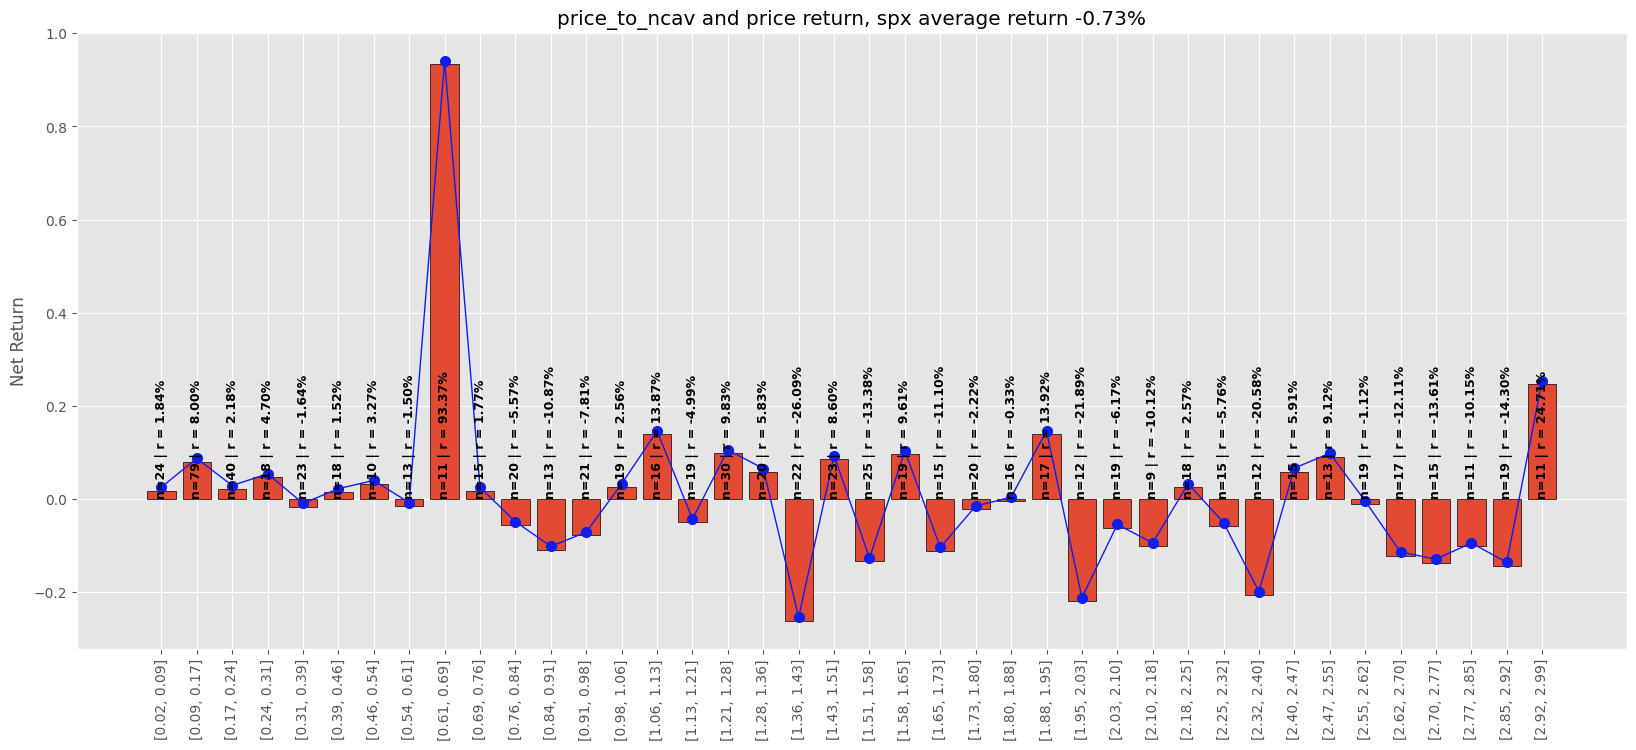

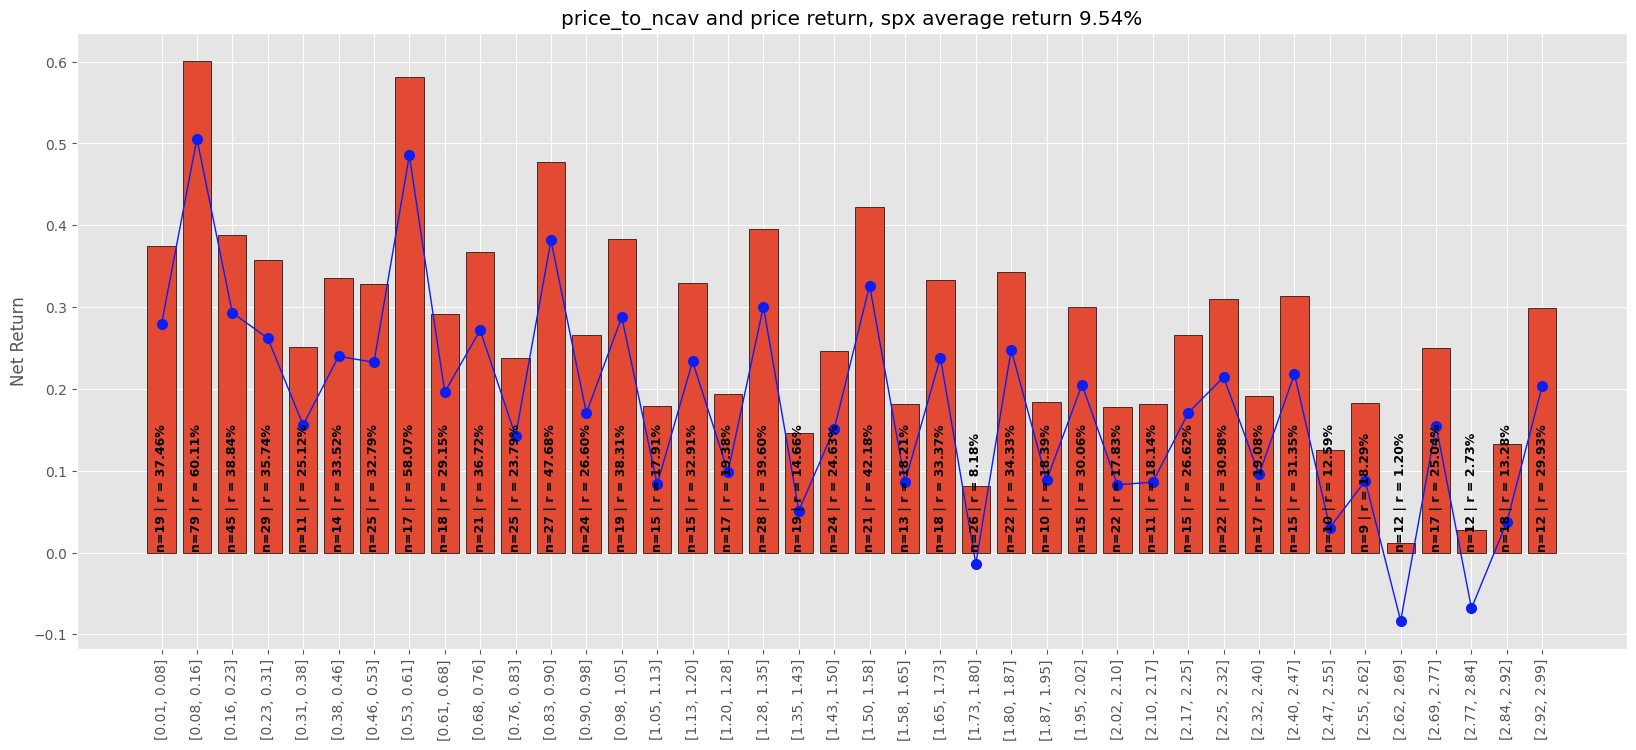

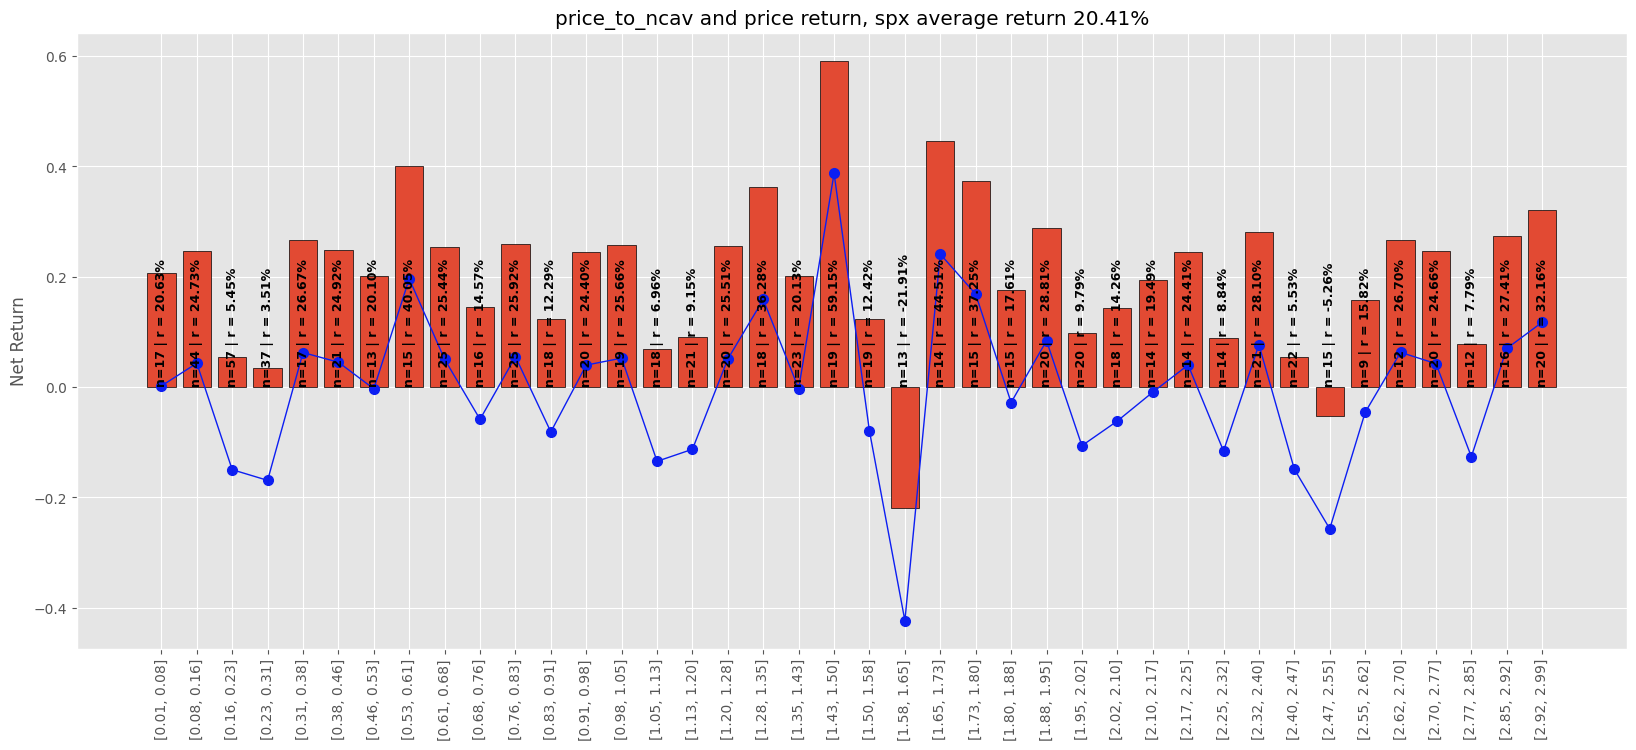

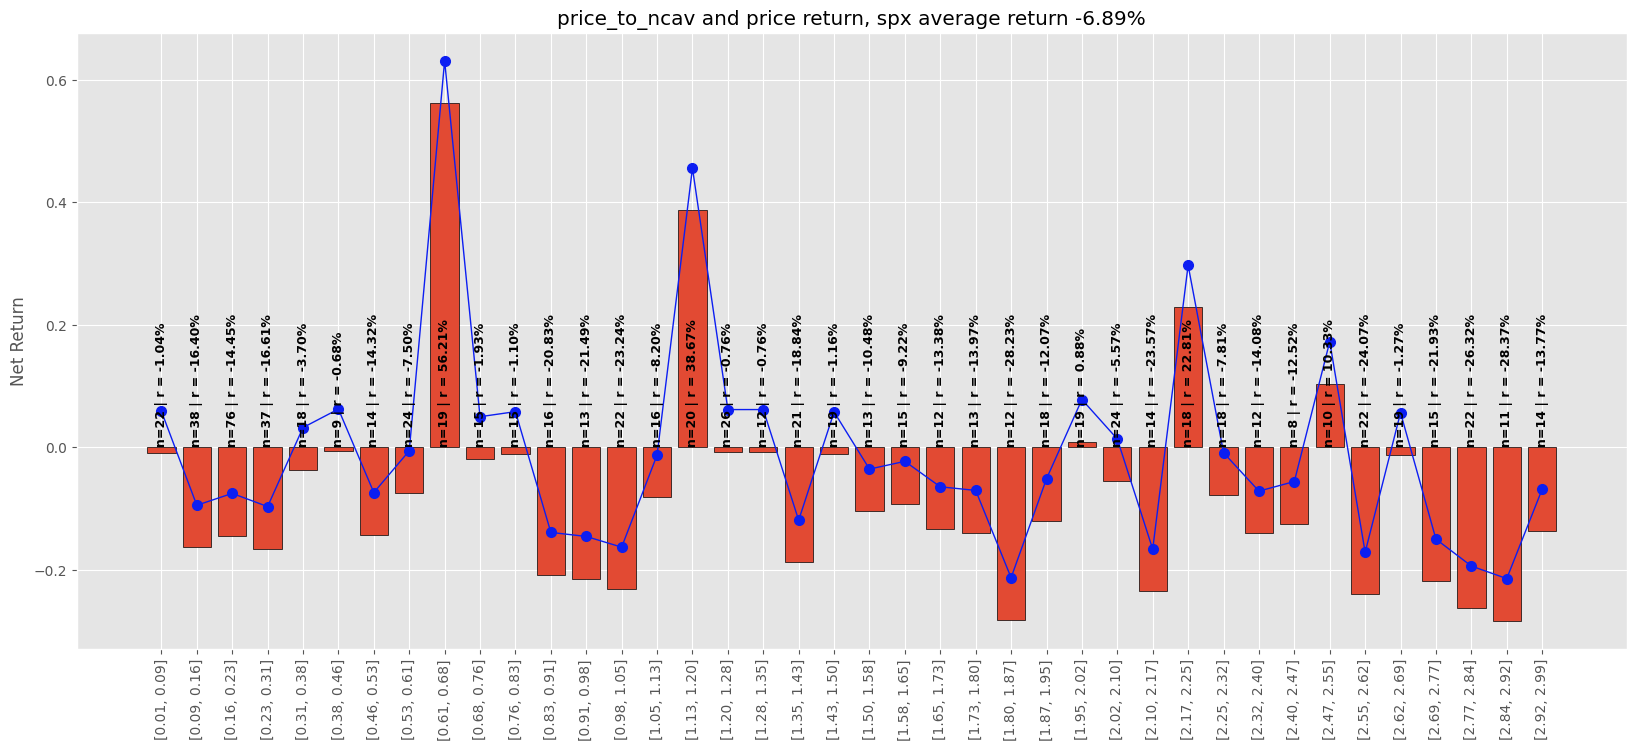

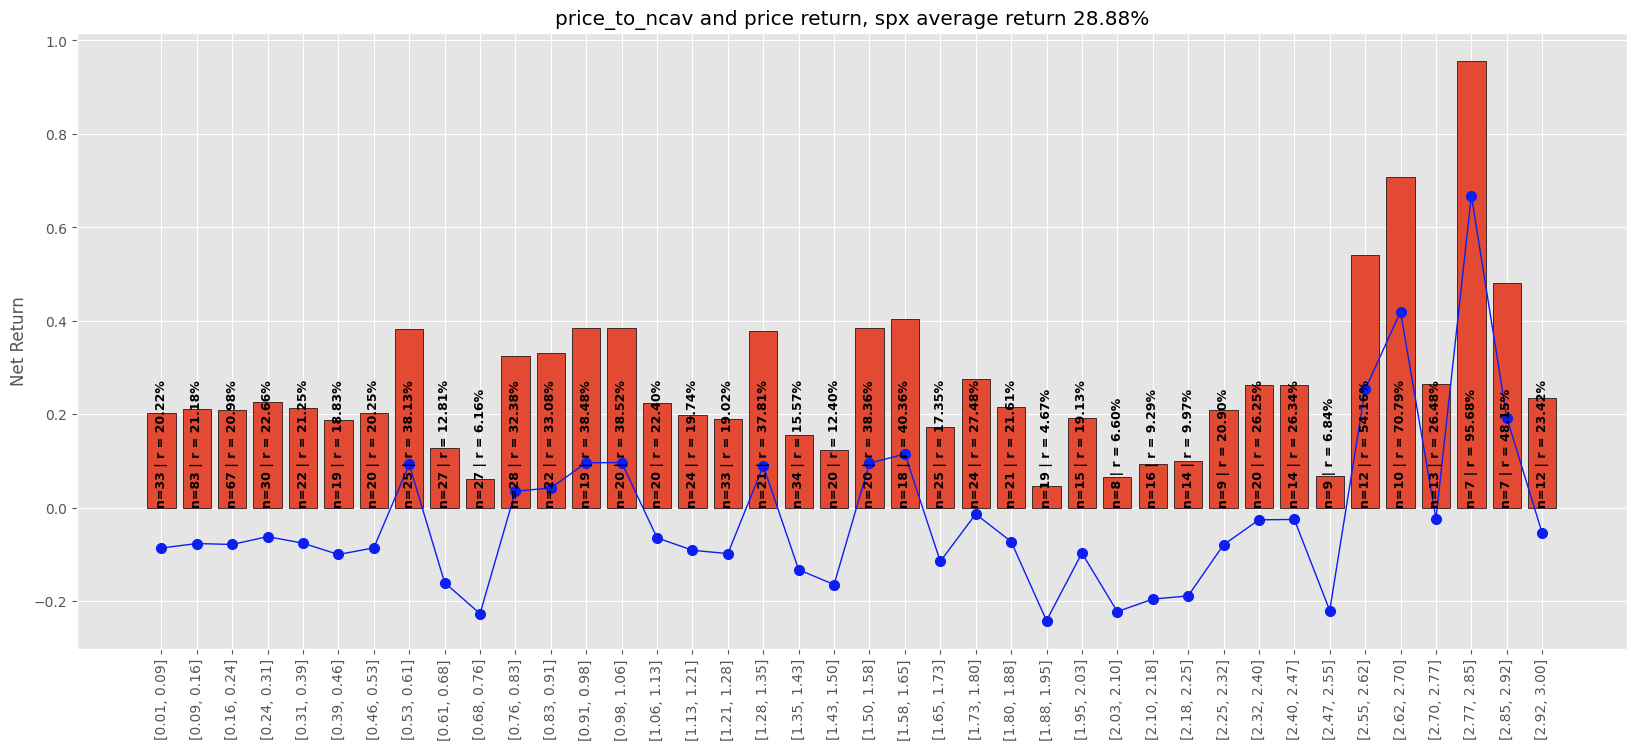

In [18]:
for yd in year_data:
    per_group_return_graph(yd, 'price_to_ncav', 0.01, 3)

# Market cap

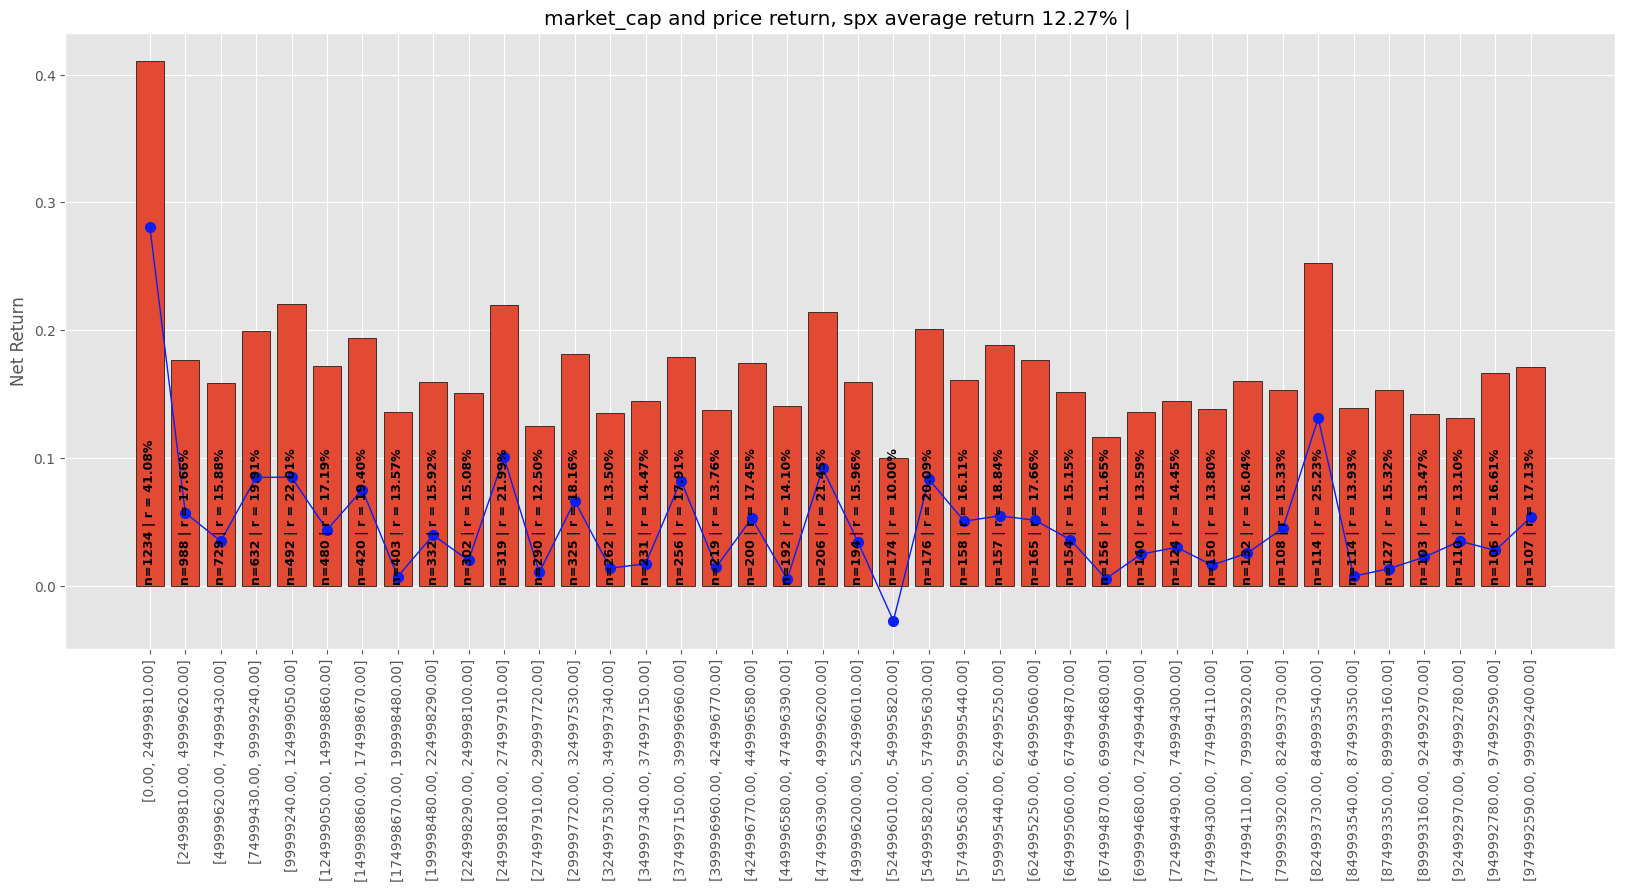

In [21]:
per_group_return_graph(d, 'market_cap', 0, 1e9)